# Ezra's Project

In [1]:
import os     
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
import scipy as sc
from scipy.stats import chi2_contingency
import bs4
from bs4 import BeautifulSoup
import requests
from collections import Counter
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
import re

In [2]:
from sklearn import preprocessing, linear_model, model_selection
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df2=pd.read_excel("df2-last.xlsx") 
df2.drop(["Unnamed: 0"],axis=1, inplace=True)

In [4]:
d={}
for x in df2.catgory.unique():
    df_tmp=df2[df2['catgory']==x].copy()
    d[x]=df_tmp.price.mean()

d

{'לחם': 12.890624999999991,
 'לחמניות ופיתות': 11.91666666666667,
 'פריכיות, מצות ותחליפי לחם': 9.861538461538455,
 'מאפייה טריה': 3.9,
 'פירות': 12.914814814814802,
 'ירקות': 10.03135048231516,
 'פירות יבשים, אגוזים ופיצוחים': 16.056363636363624,
 'חלב ומשקאות': 9.241372549019605,
 'משקאות סויה ואורז': 12.115624999999994,
 "קוטג' וגבינה לבנה": 6.7711538461538465,
 'בולגרית, פטה, ומלוחה': 22.377419354838697,
 'גבינה צהובה ומוצרלה': 20.47407407407407,
 'גבינות מחלב עיזים או כבשים': 22.957142857142852,
 'גבינות קשות': 19.838709677419345,
 'גבינות רכות': 16.188235294117643,
 'גבינת שמנת': 13.73823529411764,
 'יוגורט': 8.928395061728402,
 'מעדנים': 6.452112676056336,
 'בשר טרי': 76.78214285714287,
 'עוף והודו טרי': 31.475757575757562,
 'בשר ועוף מוכן': 35.0,
 'דגים טריים': 61.076923076923066,
 'דגים ארוזים וסושי טרי': 16.1,
 'נקניקיות': 20.67272727272726,
 'נקניקים ופסטרמה': 24.096721311475427,
 'חמאה, מרגרינה': 11.917241379310342,
 'שמנת ולבן': 2.9779999999999998,
 'שמנת לבישול והקצפה': 1

# ויזואליזציה  

לפני שנבצע טיפול בחריגים נסתכל על הנתונים בצורה חזותית 

In [5]:
df2

,super,catgory,mean_price_for_catgory,product,suplier,sizes,units,Vol_Wei,UOM,price
0,וויקטורי,לחם,12.000000,לחם אחיד פרוס אנג'ל,אנג'ל,750 גרם,1,0.750,"ק""ג",6.6
1,וויקטורי,לחם,12.000000,לחם חיטה מלאה אנג'ל,אנג'ל,750 גרם,1,0.750,"ק""ג",14.9
2,וויקטורי,לחם,12.000000,לחם מחמצת בסגנון איטלקי אנג'ל,אנג'ל,500 גרם,1,0.500,"ק""ג",15.9
3,וויקטורי,לחם,12.000000,לחם עינן קל פרוס אנג'ל,אנג'ל,500 גרם,1,0.500,"ק""ג",14.8
4,וויקטורי,לחם,12.000000,לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל,אנג'ל,750 גרם,1,0.750,"ק""ג",12.9
...,...,...,...,...,...,...,...,...,...,...
37413,שופרסל,תוספי מזון,88.955143,אוטריבייבי תרסיס לאף,אוטרימר,"15 מ""ל",1,0.015,ליטר,24.9
37414,שופרסל,תוספי מזון,88.955143,אוטרימר תרסיס לאף,אוטרימר,"100 מ""ל",1,0.100,ליטר,69.0
37415,שופרסל,לספורטאים,64.808929,קולגן בוסט קלאסי,אלטמן,30 אריזות אישיות,30,0.000,יחידה,109.0
37416,שופרסל,לספורטאים,64.808929,היילופרו,נייצ'רס פרו,30 מוסות,30,0.000,יחידה,109.0


<b>חלוקת מחירים לפי מס' מוצרים

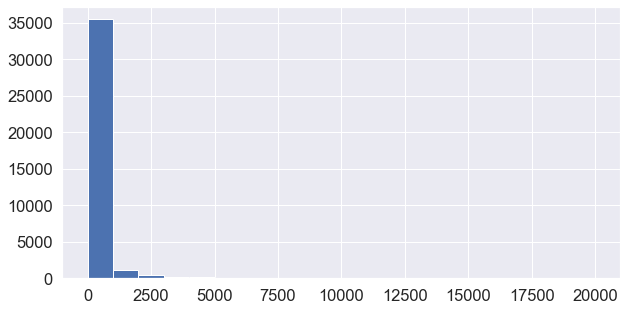

In [6]:
sns.set(font_scale = 1.5)
fig = plt.figure(figsize=(10,5))
plt.hist(df2.price, bins=20)
plt.xlabel=("price")
plt.ylabel=("Frequency")

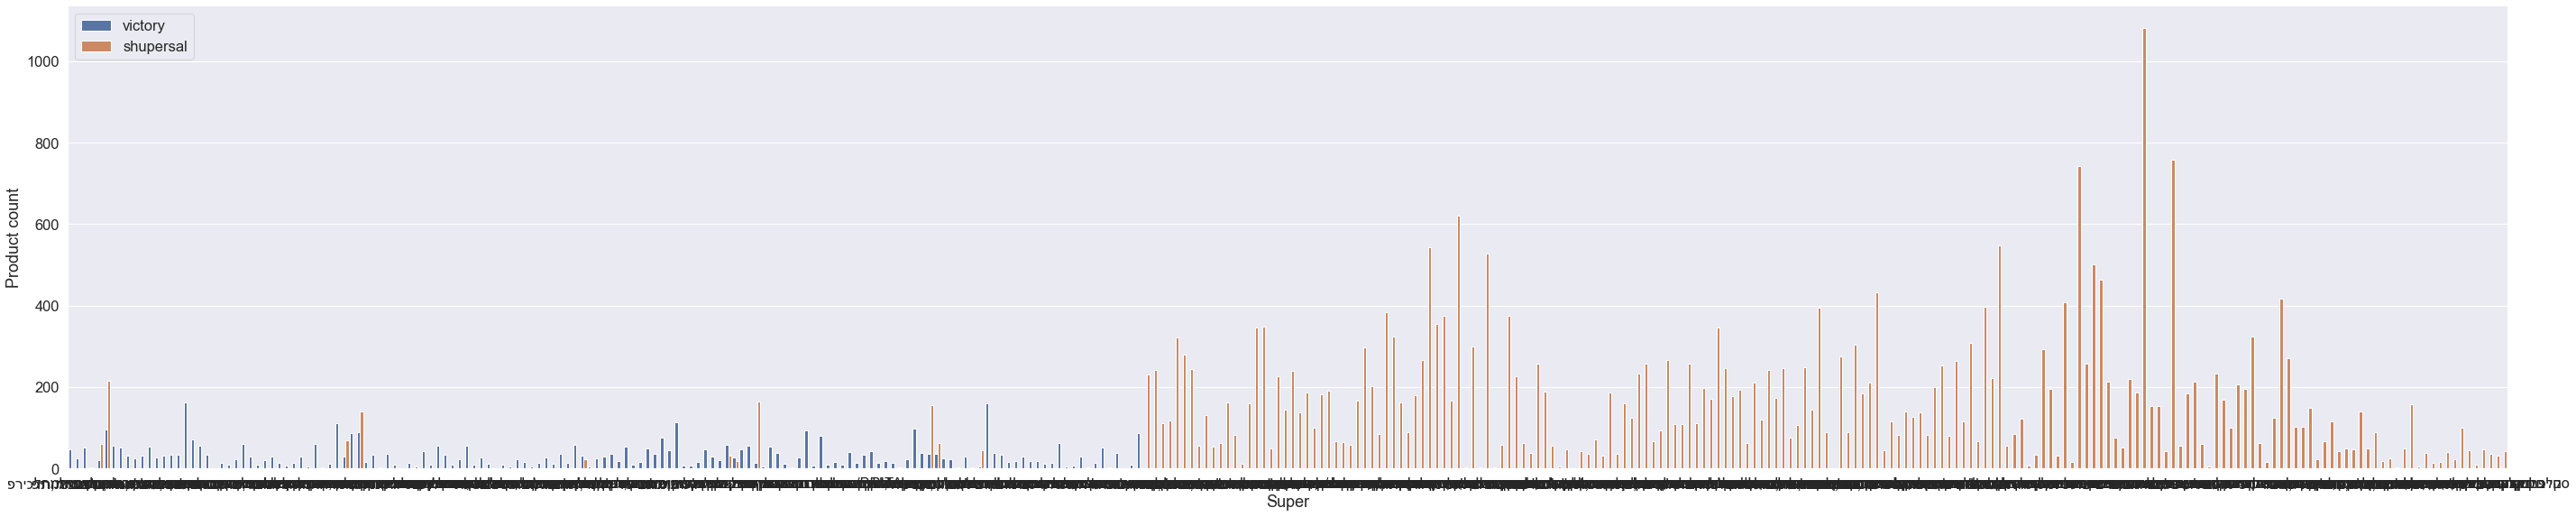

In [7]:
g = sns.catplot(
    x='catgory', 
    data=df2,
    kind='count', 
    hue='super',
    #palette=["#F39C12", "red"], 
    height=8, 
    aspect=5,
    legend=False,
    ).set_axis_labels('Super', 'Product count')
g.ax.legend(labels=['victory','shupersal'])

<b> פונקצייה להוצאת תדירות מירבית של פריט לפי שם העמודה

In [8]:
def get_frequent_elements(df, col_name, num_top_elements):
    ###
    name= []
    count=[]
    y= df[col_name].value_counts()
    d={}
    n=0
    for x in y.keys(): 
        name.append(x)
        count.append(y[x])
        n=n+1
        if (n==num_top_elements):
            break
    data = pd.Series(count, index=name)
    ser = pd.Series(name)
    ser = pd.Series(count)
    return data

In [9]:
col_name=['suplier']
y=get_frequent_elements(df2, col_name, 10)
y

(unknown,)        3256
(שופרסל,)         2300
(כללי,)            631
(GALA HOME,)       449
(GA-DE,)           312
(אסם,)             304
(CATRICE,)         263
(שופרסל גרין,)     257
(סנו,)             242
(Be NOW,)          218
dtype: int64

<b>עשרת הספקים הגדולים

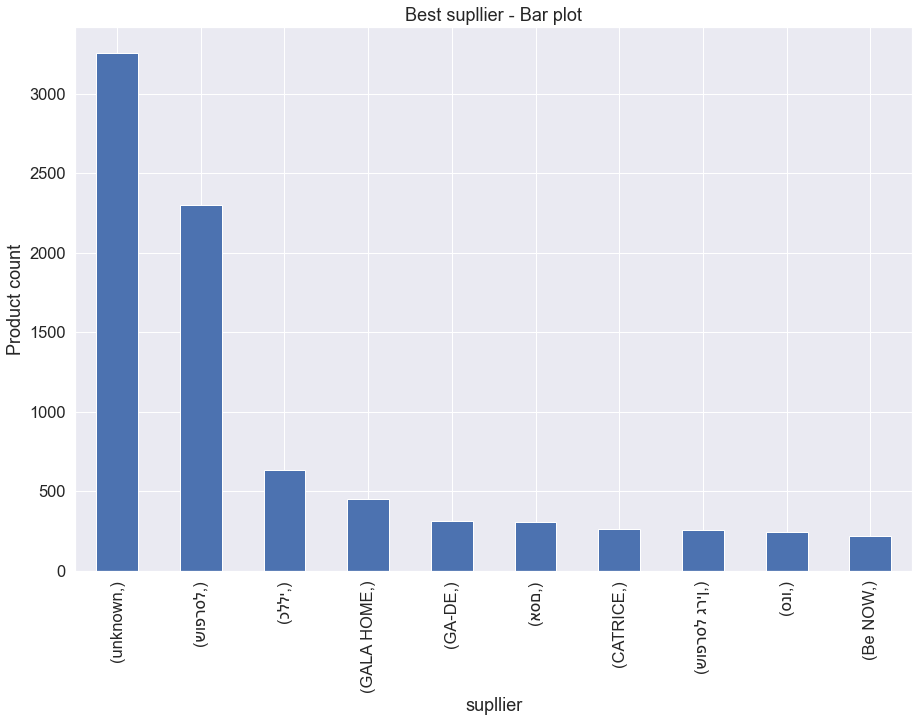

In [10]:
fig = plt.figure(figsize=(15,10))
p=y.plot(kind='bar')
plt.title("Best supllier - Bar plot")
p.set_xlabel("supllier")
p.set_ylabel("Product count")
plt.show()

<b> עשרת המוצרים היקרים ביותר

In [11]:
df_exp=df2.sort_values('price', ascending=False).copy()
df_exp=df_exp.iloc[:10,:]
df_exp.reset_index(inplace=True)
df_exp

,index,super,catgory,mean_price_for_catgory,product,suplier,sizes,units,Vol_Wei,UOM,price
0,18398,שופרסל,מוצרי טיפוח אישי,589.758036,LUXURY 4D MASSAGE CHAIR כורסאת עיסוי בטכנולוגי...,MEDICS CARE,MC 79900,1,0.0,יחידה,19990.0
1,26441,שופרסל,ארגון ואחסון,1967.561176,מחסן גינה יוקון 11x21.3 כולל רצפה,Canopia by Palram,252x643x332,1,0.0,יחידה,15999.0
2,23543,שופרסל,ריהוט גן,2126.462357,מערכת ישיבה טיבט 4 חלקים,SUNRISE,4 חלקים,4,0.0,יחידה,13900.0
3,26448,שופרסל,ארגון ואחסון,1967.561176,מחסן גינה יוקון 11x17.2 כולל רצפה,Canopia by Palram,252x519x332,1,0.0,יחידה,12999.0
4,26426,שופרסל,ארגון ואחסון,1967.561176,מחסן יוקון 11X21.3 אפור,Canopia by Palram,252x643x332,1,0.0,יחידה,12999.0
5,23695,שופרסל,"גרילים, מעשנות ואביזרים למנגל",1477.929365,מעשנה בשר וגריל טרייגר TREAGER,TRAEGER,TIMBERLINE 1300,1,0.0,יחידה,12900.0
6,23541,שופרסל,ריהוט גן,2126.462357,מערכת ישיבה האיטי,SUNRISE,4חלקים,4,0.0,יחידה,10990.0
7,23683,שופרסל,"גרילים, מעשנות ואביזרים למנגל",1477.929365,מעשנת בשר וגריל טרייגר TREAGER,TRAEGER,TIMBERLINE 850,1,0.0,יחידה,10900.0
8,26446,שופרסל,ארגון ואחסון,1967.561176,מחסן יוקון 11X17.2 אפור,Canopia by Palram,252x519x332,1,0.0,יחידה,10499.0
9,26445,שופרסל,ארגון ואחסון,1967.561176,מחסן גינה יוקון 11x13.1 כולל רצפה,Canopia by Palram,252x395x332,1,0.0,יחידה,9999.8


<AxesSubplot:xlabel='product', ylabel='price'>

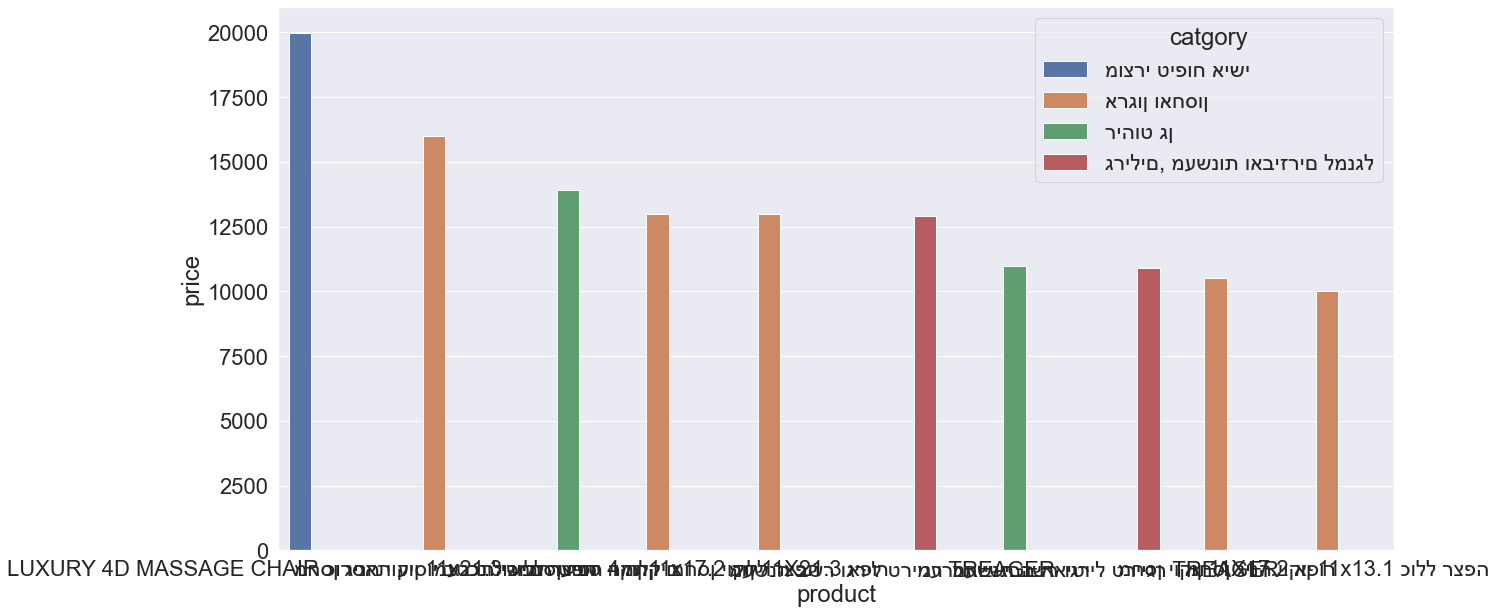

In [12]:
fig = plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
sns.barplot(x='product', y='price', data=df_exp, hue='catgory', ci = 0)

<b> עשרת הקטגוריות היקרות ביותר

In [13]:
category=[]
mean_price=[]
for x in df2.catgory.unique():
    df_tmp=df2[df2['catgory']==x].copy()
    category.append(x)
    mean_price.append(df_tmp.price.mean())
df_cat_mean= pd.DataFrame({"category":category, "mean price":mean_price})

In [14]:
df_cat_mean.sort_values('mean price', ascending=False,inplace=True)
df_cat_mean.reset_index(inplace=True)
df_cat_mean.drop(["index"],axis=1, inplace=True)
df_cat_mean

,category,mean price
0,ספות ומערכות ישיבה,2880.989740
1,מקררים ומדיחי כלים,2578.169591
2,ריהוט גן,2126.462357
3,"מיטות, מזרנים ומגני מזרן",2101.089573
4,ארגון ואחסון,1967.561176
...,...,...
334,רוגלך ומאפים מתוקים,5.400000
335,תערובות תיבול,4.900000
336,מאפייה טריה,3.900000
337,שמנת ולבן,2.978000


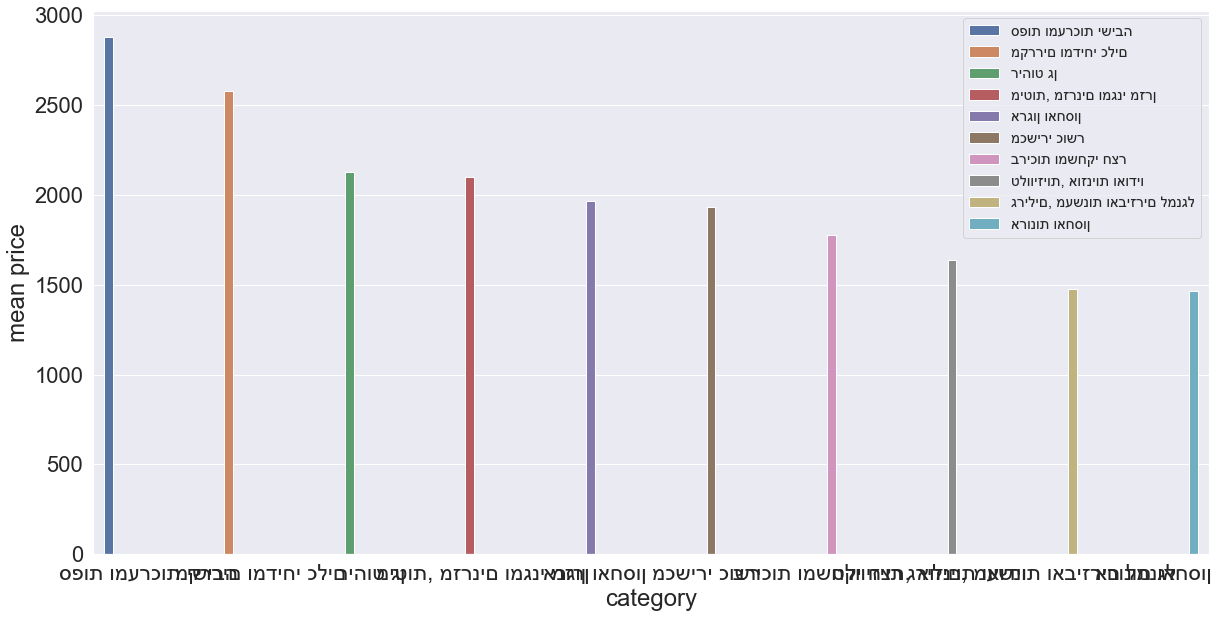

In [15]:
fig = plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
sns.barplot(x='category', y='mean price', data=df_cat_mean.iloc[:10,:], hue='category', ci = 0)
plt.legend(fontsize = 15)

<b>חלוקה מחיר לקטגוריה לפי סופר וויקטורי

Text(0.5, 1.0, 'Victory')

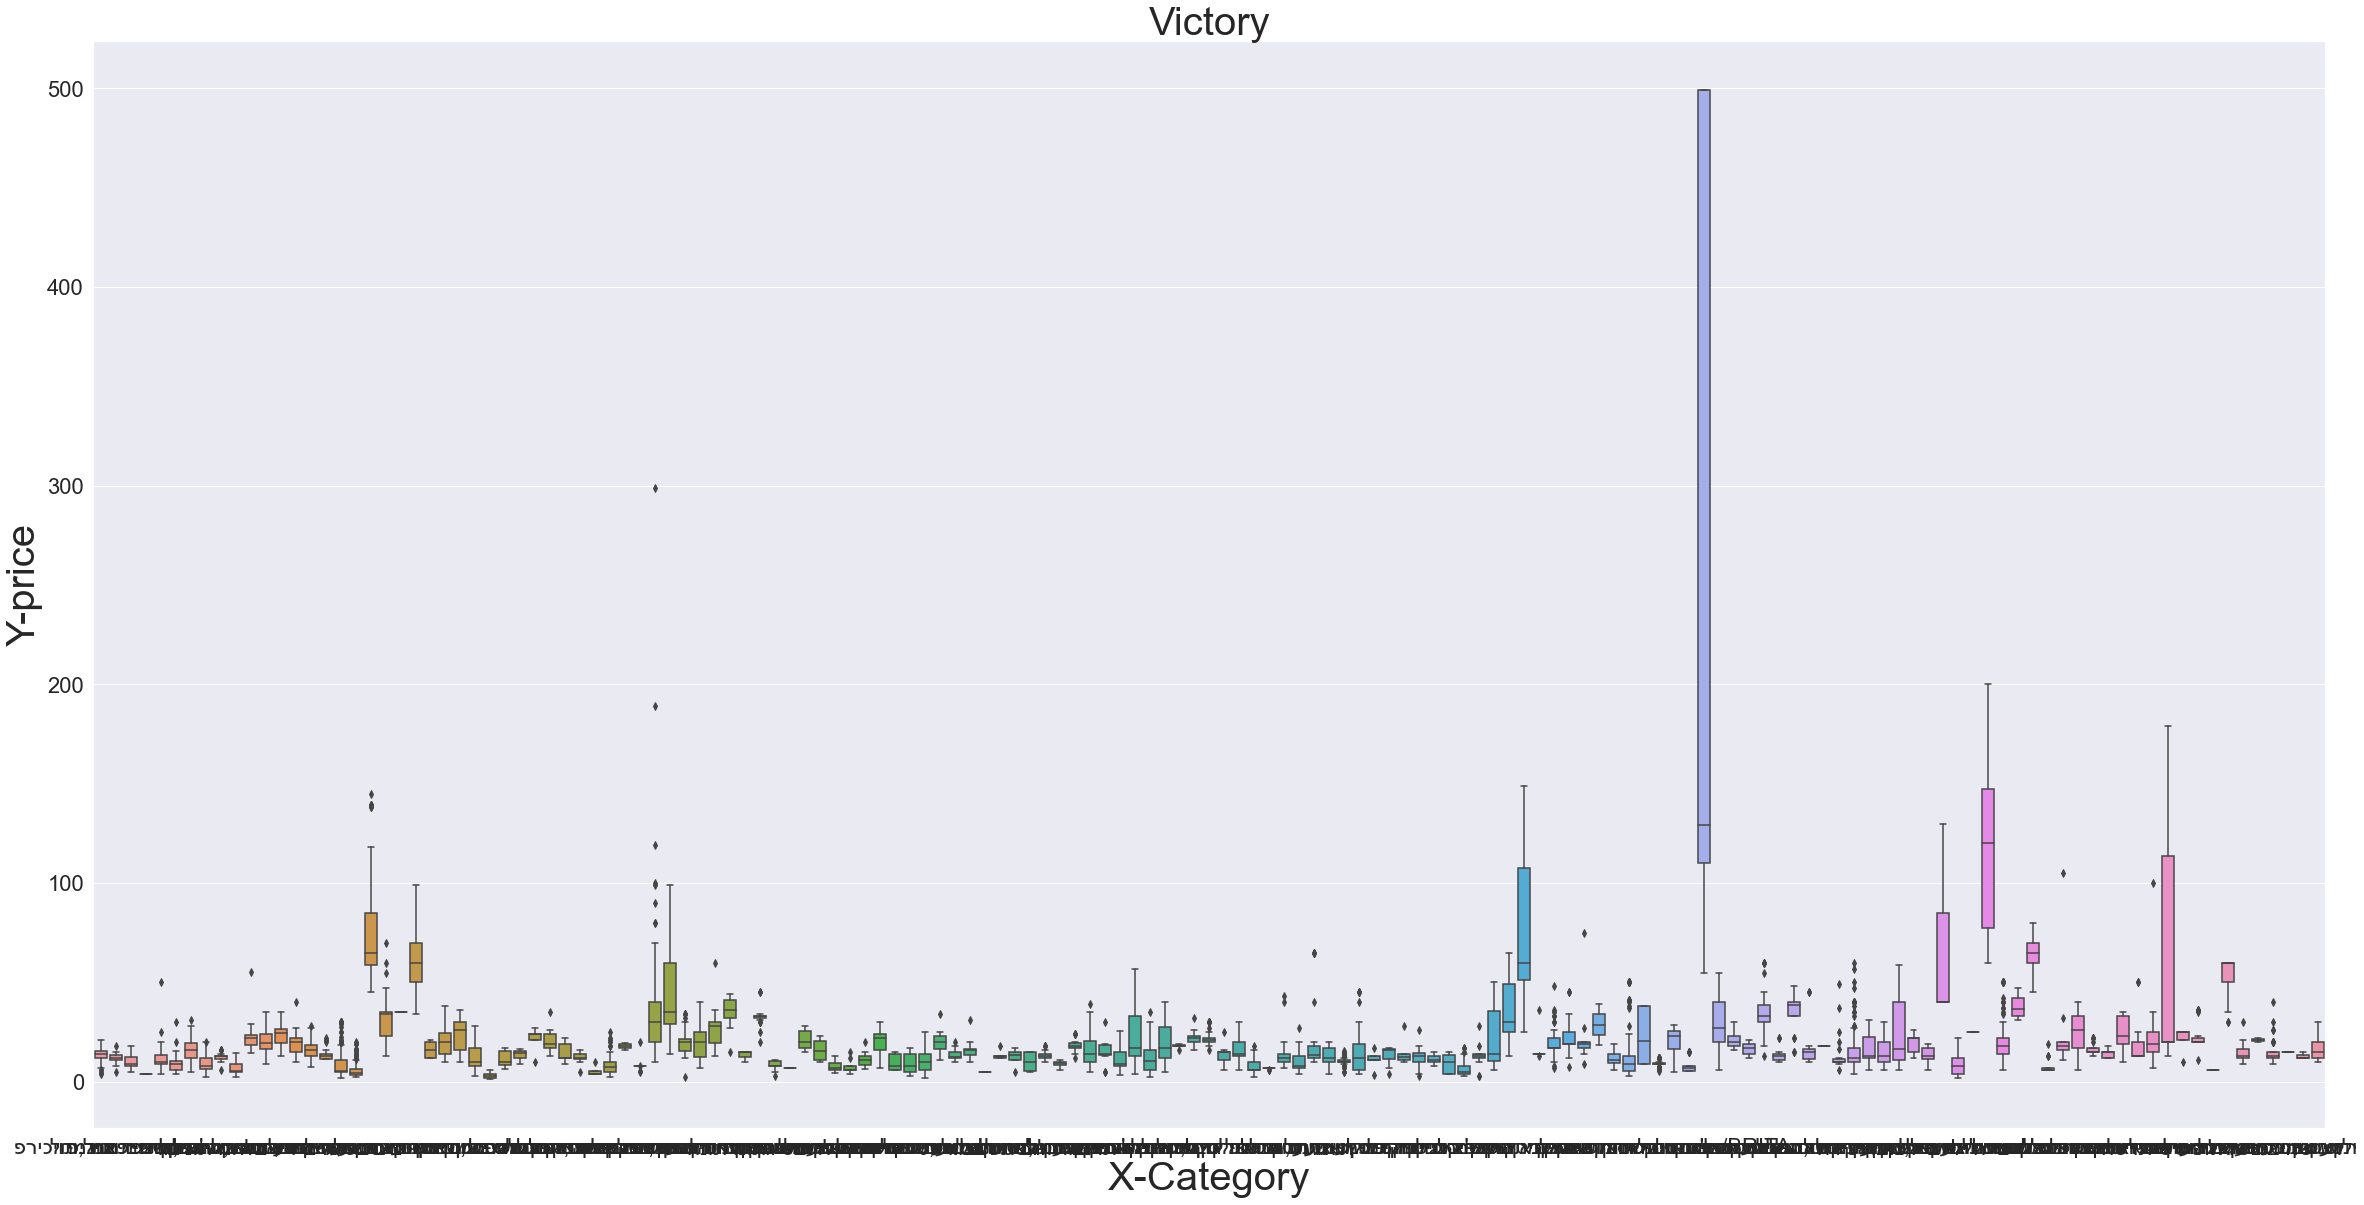

In [16]:
fig = plt.figure(figsize=(40,20))
p =sns.boxplot(x='catgory', y='price', data=df2[df2['super']=='וויקטורי'])
p.set_xlabel("X-Category", fontsize = 40)
p.set_ylabel("Y-price", fontsize = 40)
p.set_title("Victory", fontsize = 40)

<b>חלוקה מחיר לקטגוריה לפי סופר שופרסל

Text(0.5, 1.0, 'Shupersal')

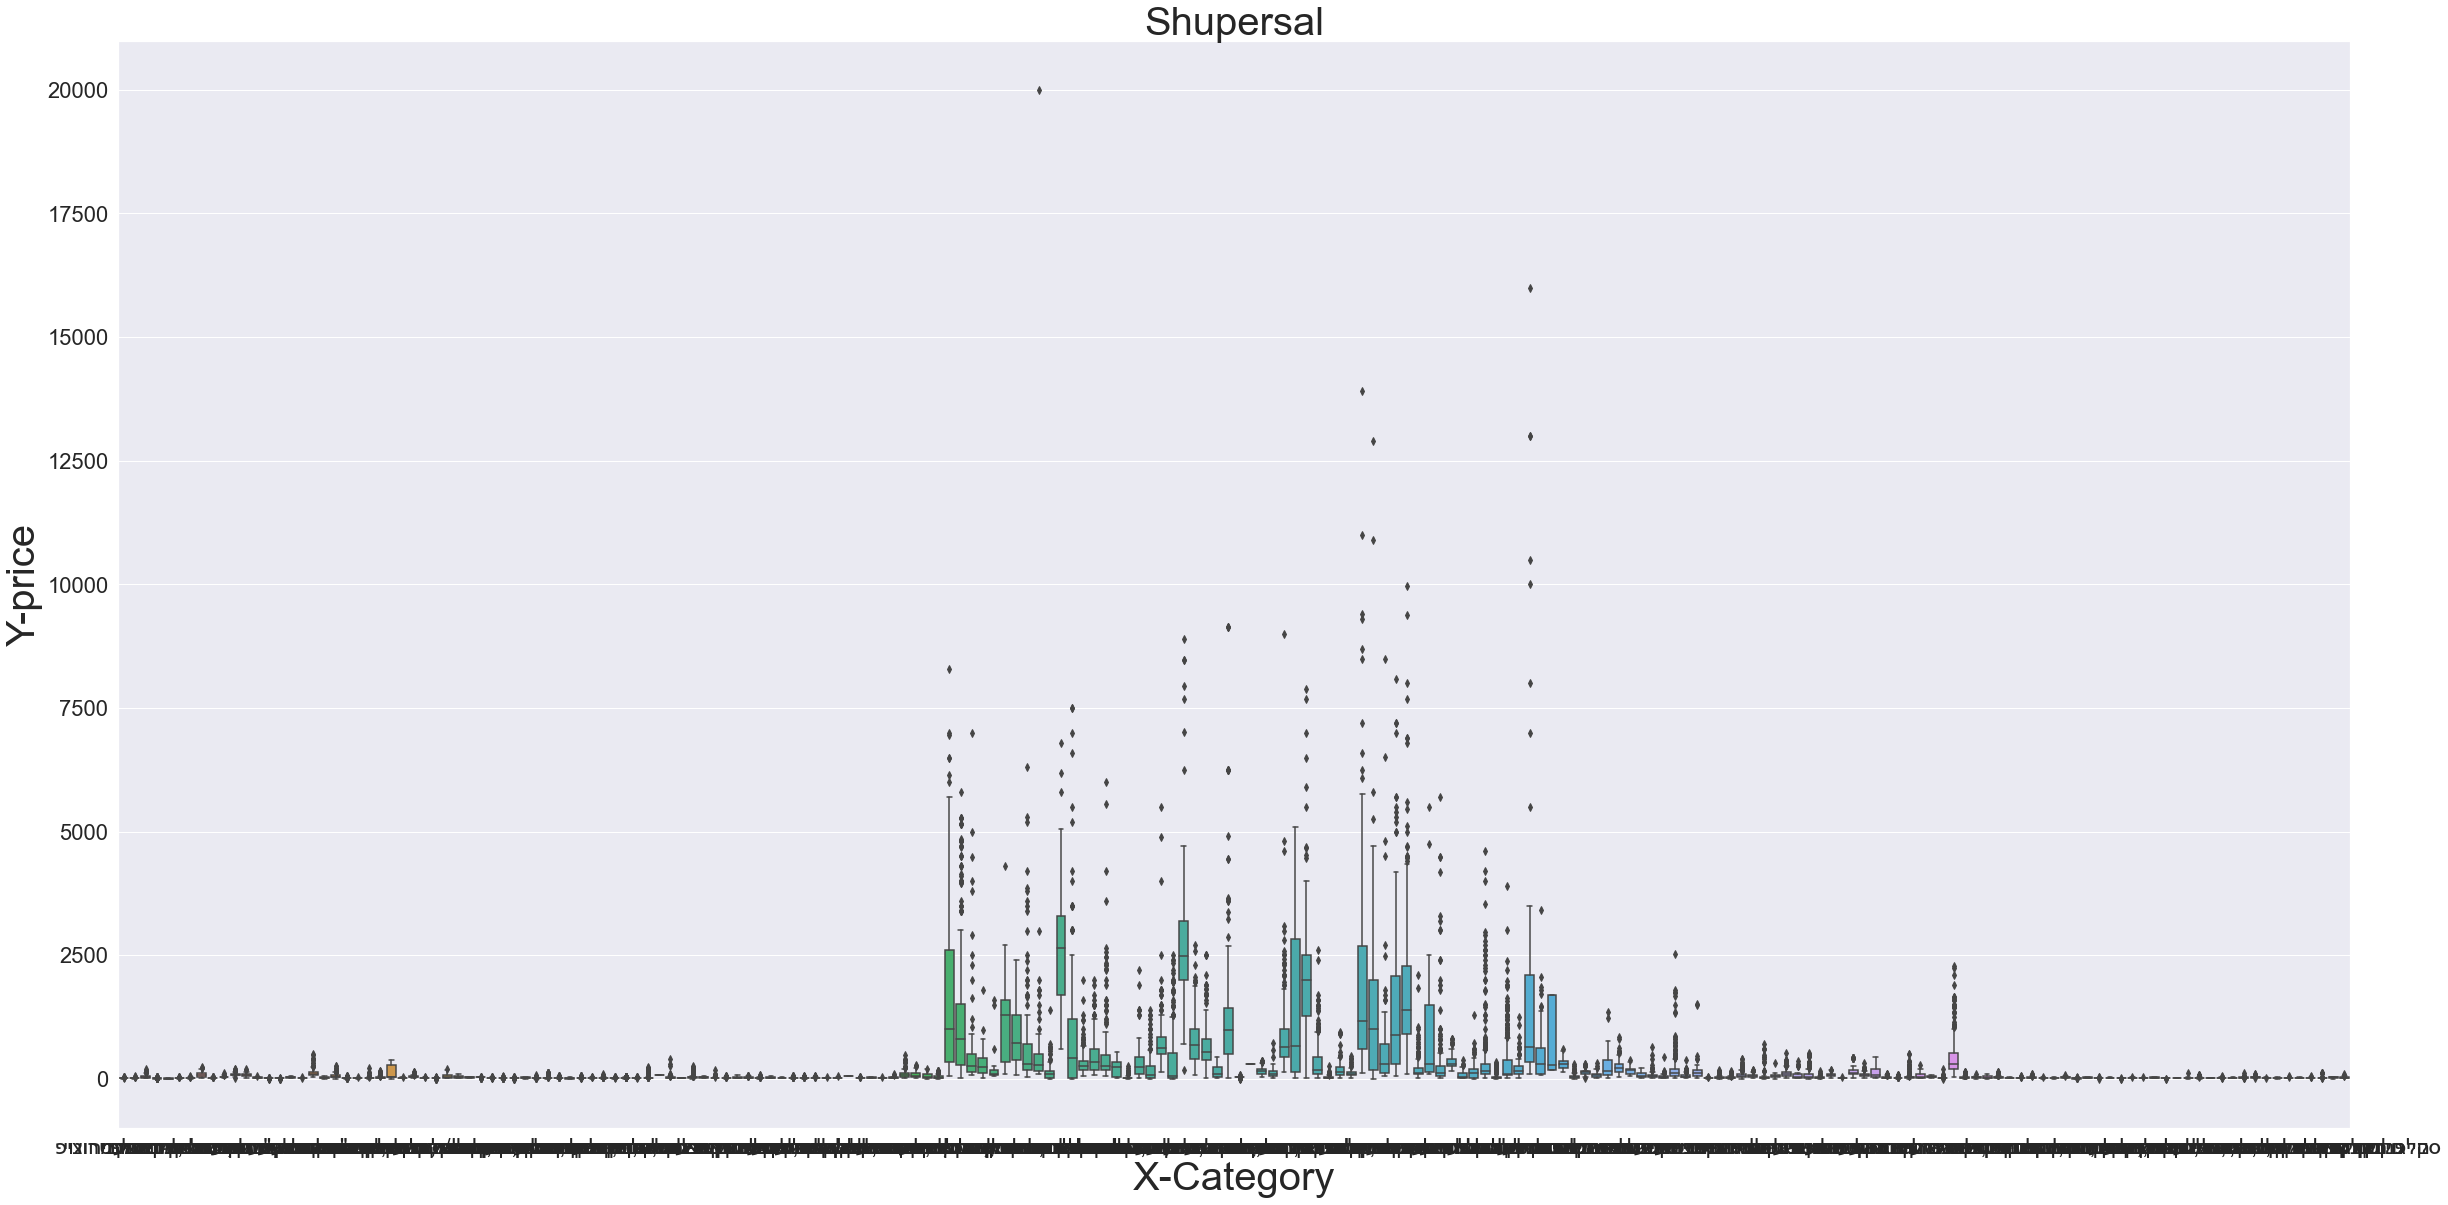

In [17]:
fig = plt.figure(figsize=(40,20))
p=sns.boxplot(x='catgory', y='price', data=df2[df2['super']=='שופרסל'])
p.set_xlabel("X-Category", fontsize = 40)
p.set_ylabel("Y-price", fontsize = 40)
p.set_title("Shupersal", fontsize = 40)

In [18]:
df2

,super,catgory,mean_price_for_catgory,product,suplier,sizes,units,Vol_Wei,UOM,price
0,וויקטורי,לחם,12.000000,לחם אחיד פרוס אנג'ל,אנג'ל,750 גרם,1,0.750,"ק""ג",6.6
1,וויקטורי,לחם,12.000000,לחם חיטה מלאה אנג'ל,אנג'ל,750 גרם,1,0.750,"ק""ג",14.9
2,וויקטורי,לחם,12.000000,לחם מחמצת בסגנון איטלקי אנג'ל,אנג'ל,500 גרם,1,0.500,"ק""ג",15.9
3,וויקטורי,לחם,12.000000,לחם עינן קל פרוס אנג'ל,אנג'ל,500 גרם,1,0.500,"ק""ג",14.8
4,וויקטורי,לחם,12.000000,לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל,אנג'ל,750 גרם,1,0.750,"ק""ג",12.9
...,...,...,...,...,...,...,...,...,...,...
37413,שופרסל,תוספי מזון,88.955143,אוטריבייבי תרסיס לאף,אוטרימר,"15 מ""ל",1,0.015,ליטר,24.9
37414,שופרסל,תוספי מזון,88.955143,אוטרימר תרסיס לאף,אוטרימר,"100 מ""ל",1,0.100,ליטר,69.0
37415,שופרסל,לספורטאים,64.808929,קולגן בוסט קלאסי,אלטמן,30 אריזות אישיות,30,0.000,יחידה,109.0
37416,שופרסל,לספורטאים,64.808929,היילופרו,נייצ'רס פרו,30 מוסות,30,0.000,יחידה,109.0


In [19]:
df2['mean_price_for_catgory'].unique().min()

nan

In [20]:
for x in d:
    print(f"{x}: {d[x]}")

לחם: 12.890624999999991
לחמניות ופיתות: 11.91666666666667
פריכיות, מצות ותחליפי לחם: 9.861538461538455
מאפייה טריה: 3.9
פירות: 12.914814814814802
ירקות: 10.03135048231516
פירות יבשים, אגוזים ופיצוחים: 16.056363636363624
חלב ומשקאות: 9.241372549019605
משקאות סויה ואורז: 12.115624999999994
קוטג' וגבינה לבנה: 6.7711538461538465
בולגרית, פטה, ומלוחה: 22.377419354838697
גבינה צהובה ומוצרלה: 20.47407407407407
גבינות מחלב עיזים או כבשים: 22.957142857142852
גבינות קשות: 19.838709677419345
גבינות רכות: 16.188235294117643
גבינת שמנת: 13.73823529411764
יוגורט: 8.928395061728402
מעדנים: 6.452112676056336
בשר טרי: 76.78214285714287
עוף והודו טרי: 31.475757575757562
בשר ועוף מוכן: 35.0
דגים טריים: 61.076923076923066
דגים ארוזים וסושי טרי: 16.1
נקניקיות: 20.67272727272726
נקניקים ופסטרמה: 24.096721311475427
חמאה, מרגרינה: 11.917241379310342
שמנת ולבן: 2.9779999999999998
שמנת לבישול והקצפה: 10.894285714285717
סלטים: 13.539999999999996
פסטה טריה: 22.4
ביצים: 21.21428571428572
טופו וסייטן: 14.3642857142

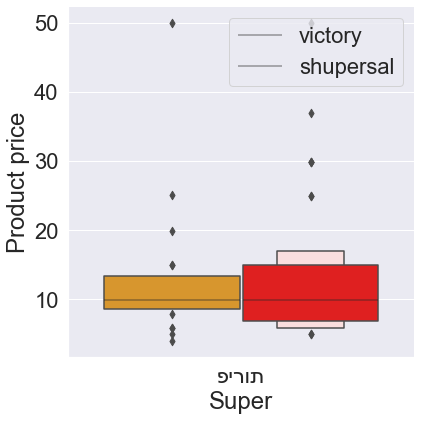

In [21]:
g = sns.catplot(
    x='catgory', 
    y='price',
    data=df2[df2.catgory=="פירות"],
    kind='boxen', 
    hue='super',
    palette=["#F39C12", "red"], 
    height=6, 
    aspect=1,
    legend=False,
    ).set_axis_labels('Super', 'Product price')
g.ax.legend(labels=['victory','shupersal'])


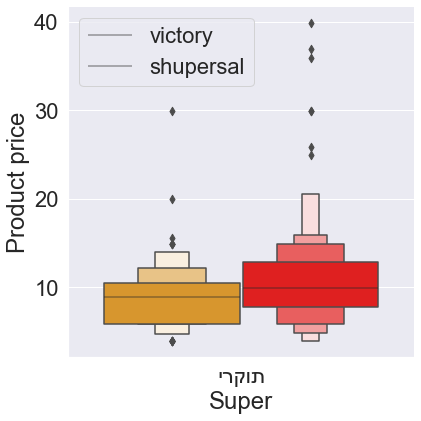

In [22]:
g = sns.catplot(
    x='catgory', 
    y='price',
    data=df2[df2.catgory=="ירקות"],
    kind='boxen', 
    hue='super',
    palette=["#F39C12", "red"], 
    height=6, 
    aspect=1,
    legend=False,
    ).set_axis_labels('Super', 'Product price')
g.ax.legend(labels=['victory','shupersal'])

ValueError: min() arg is an empty sequence

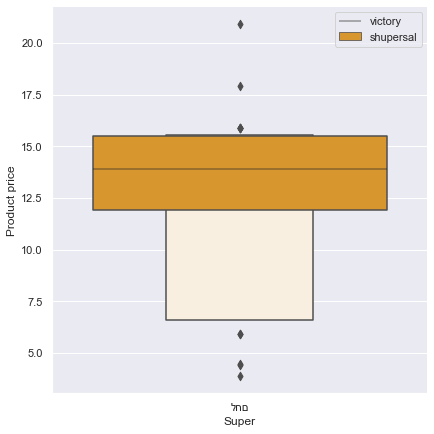

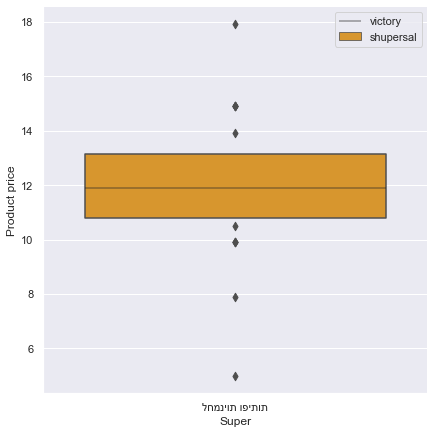

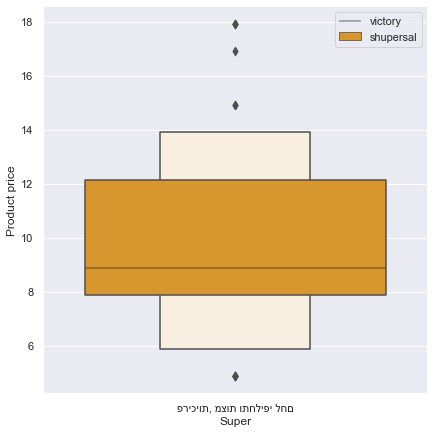

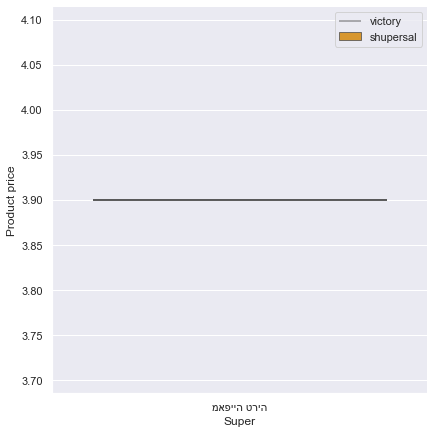

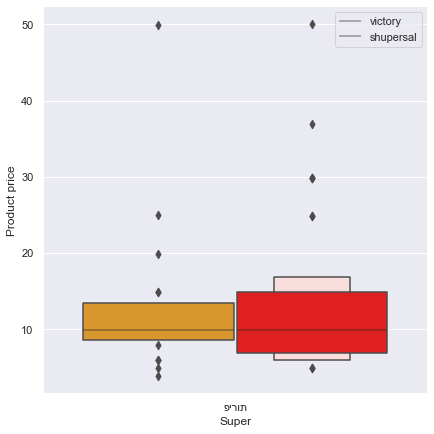

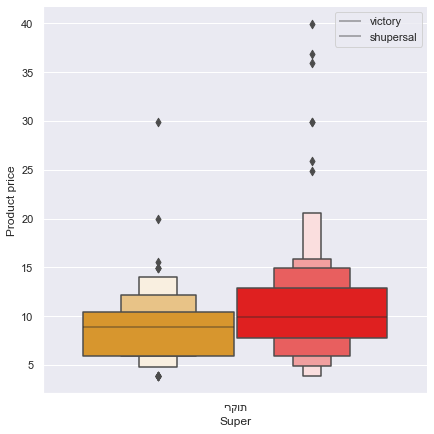

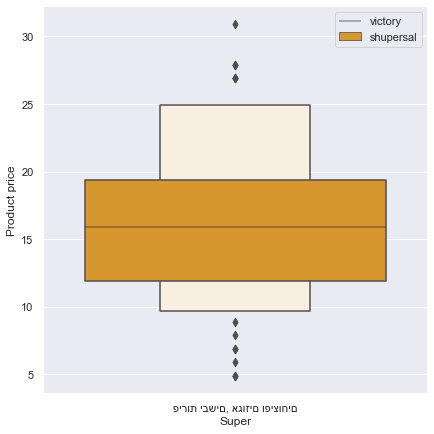

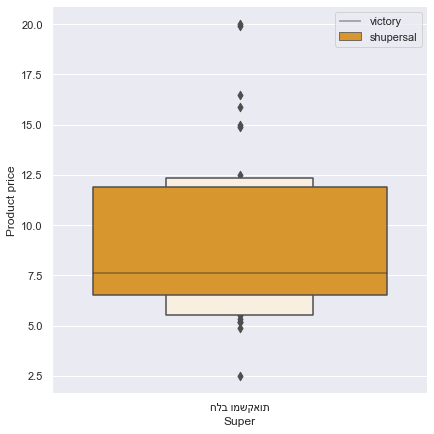

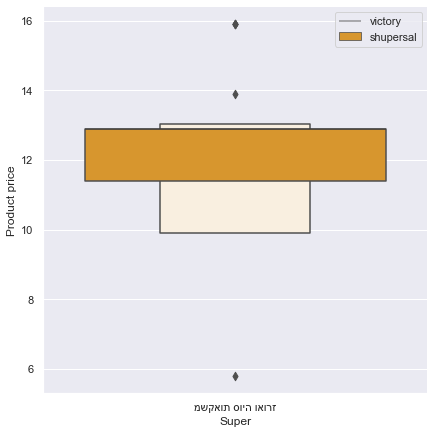

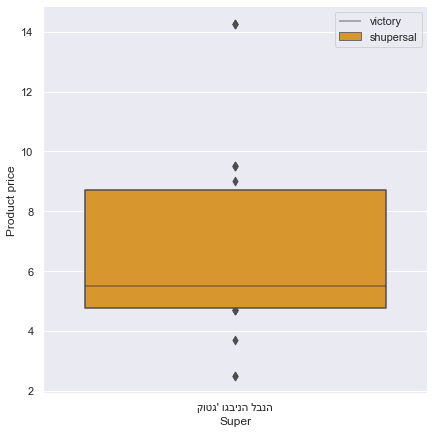

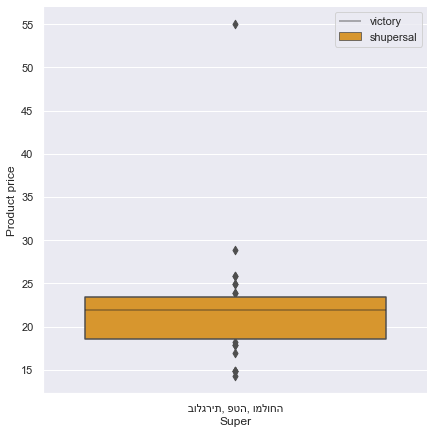

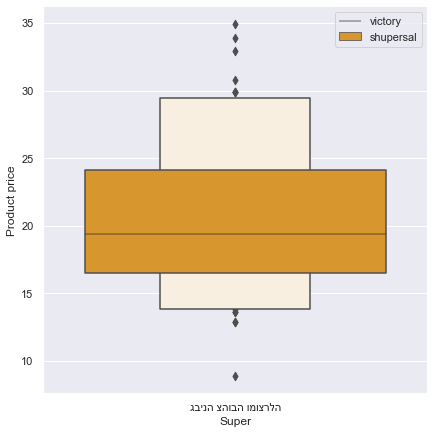

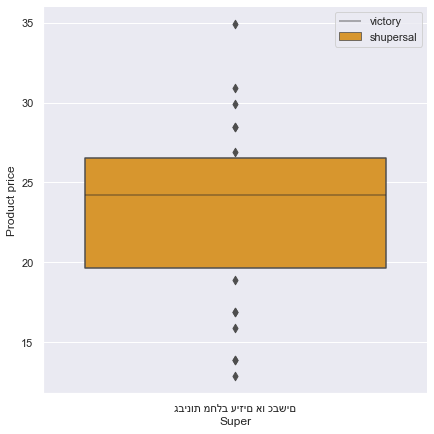

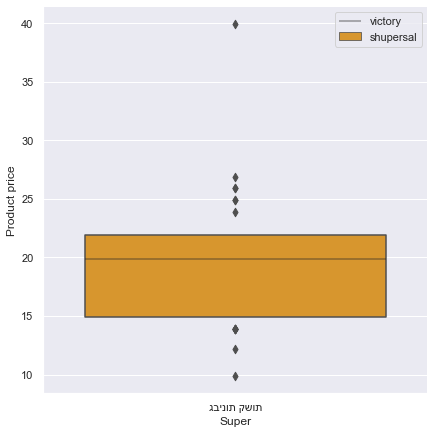

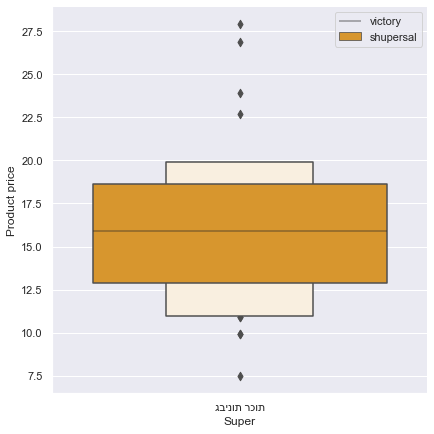

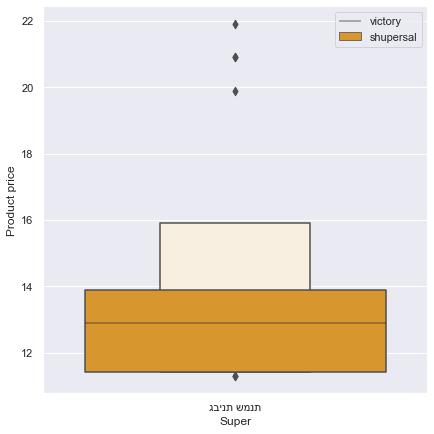

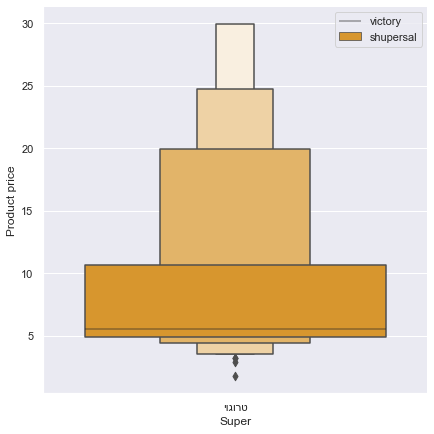

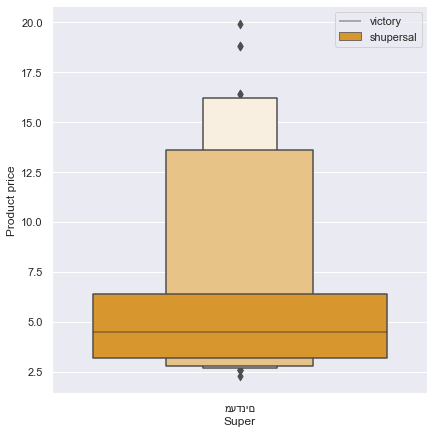

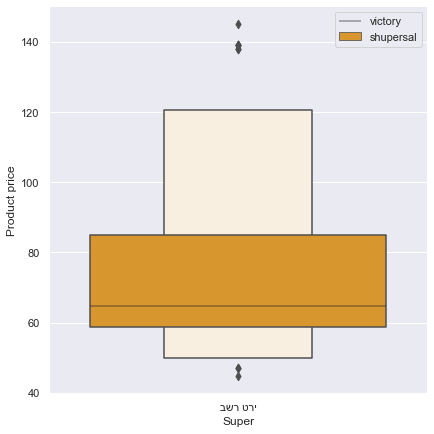

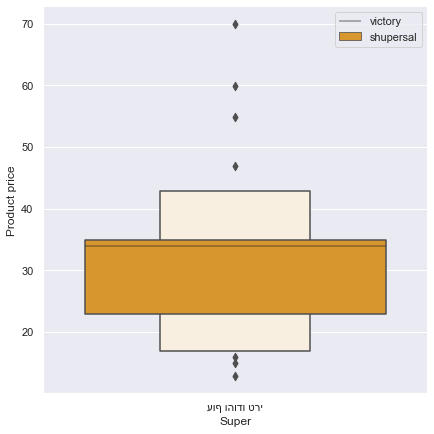

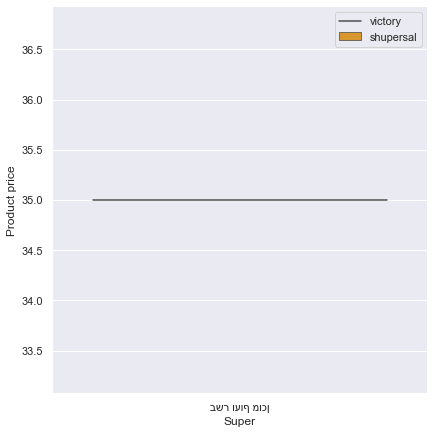

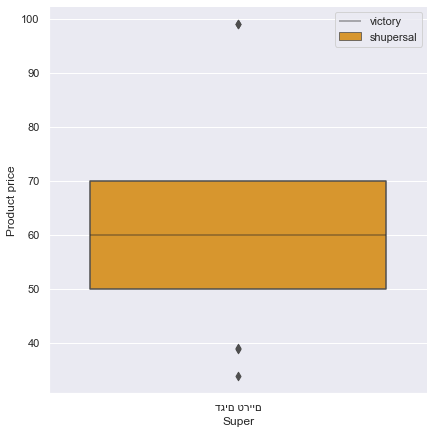

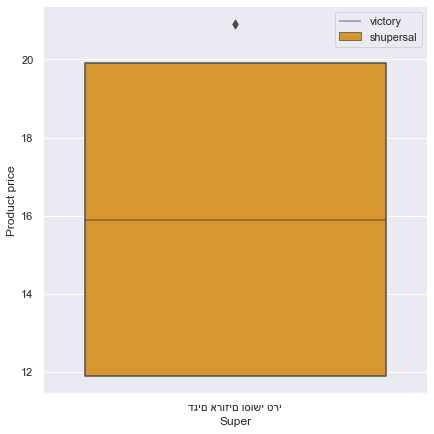

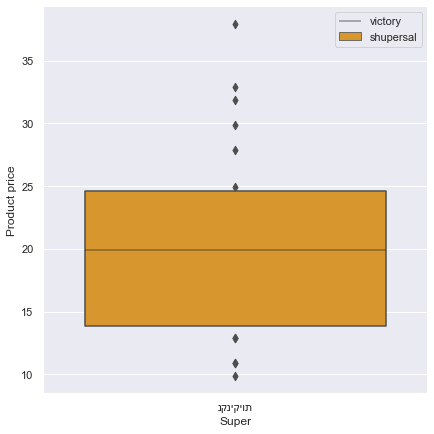

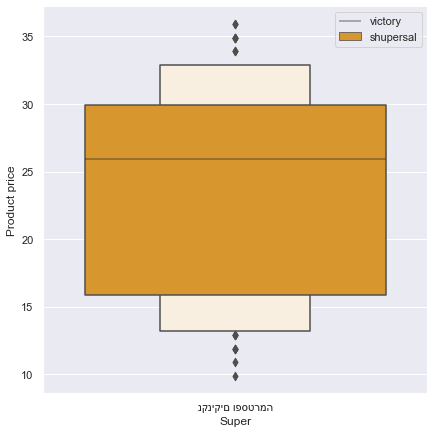

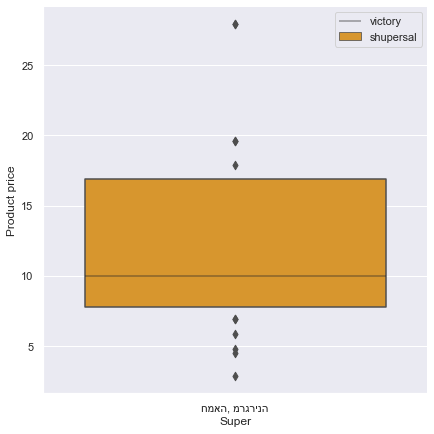

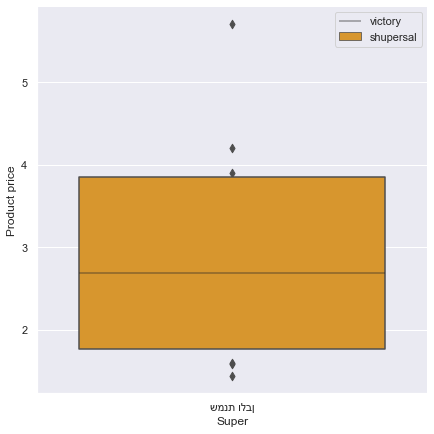

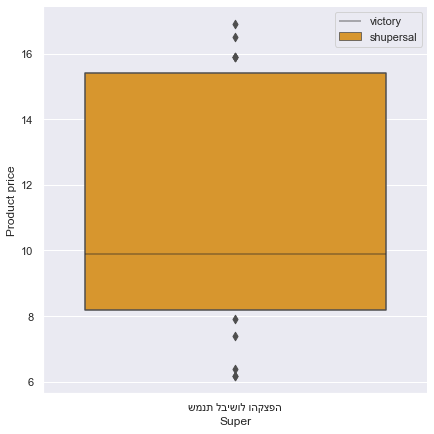

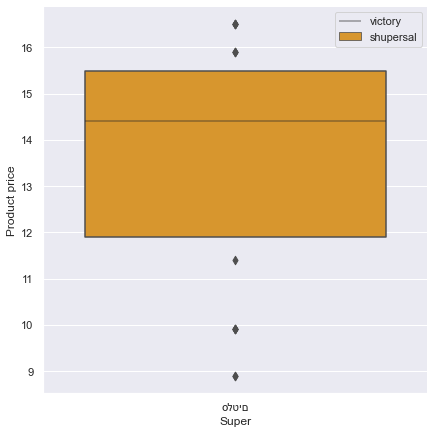

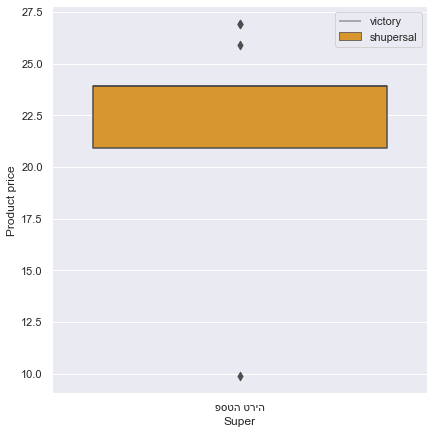

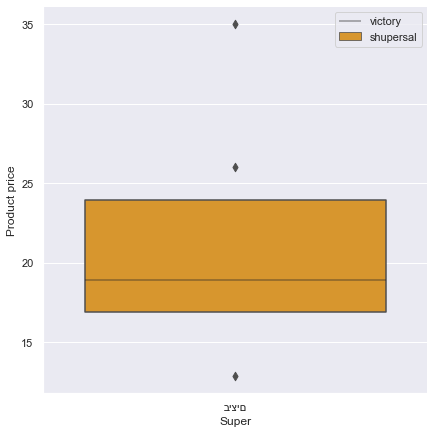

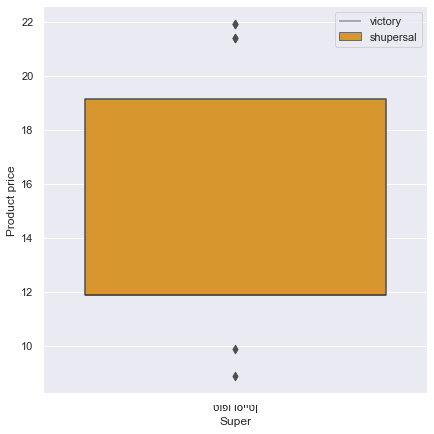

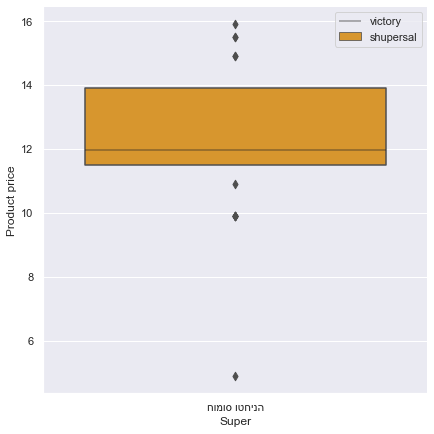

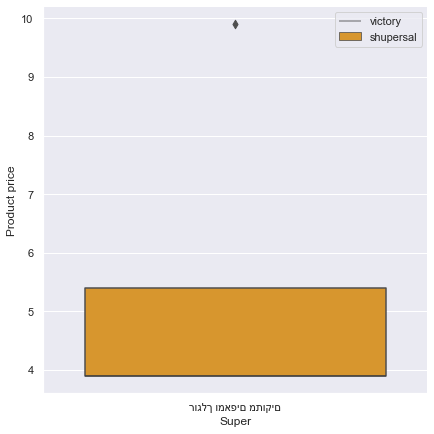

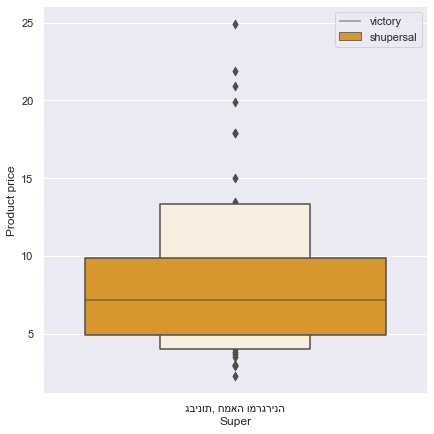

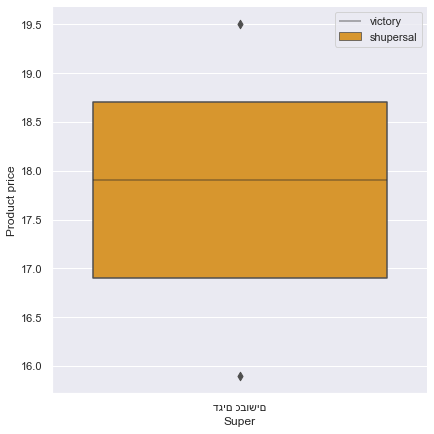

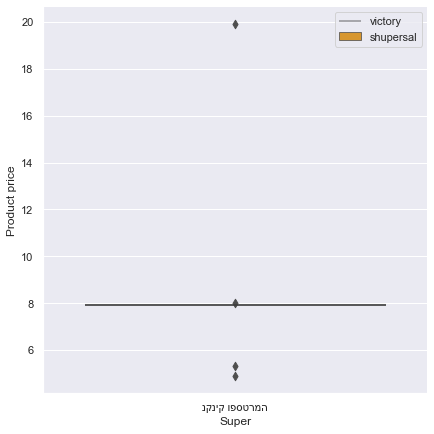

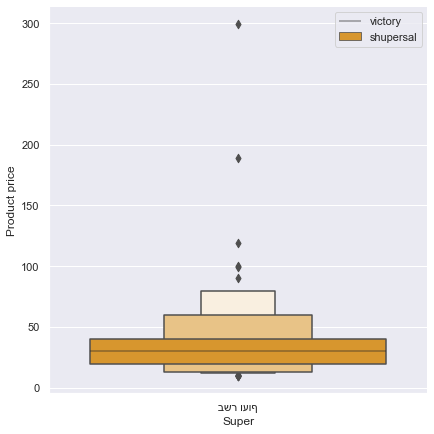

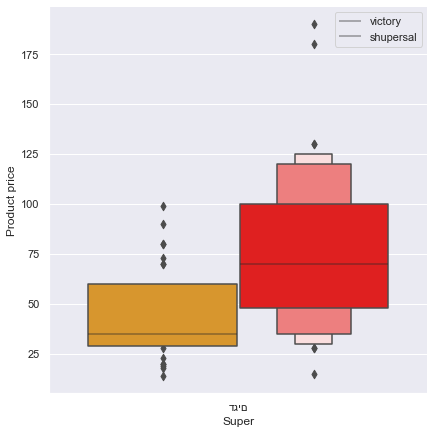

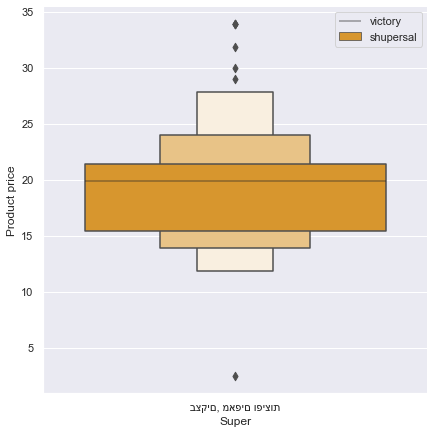

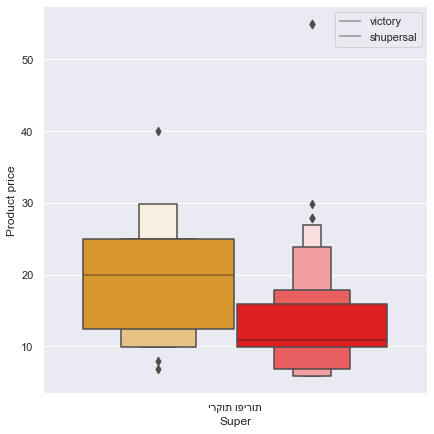

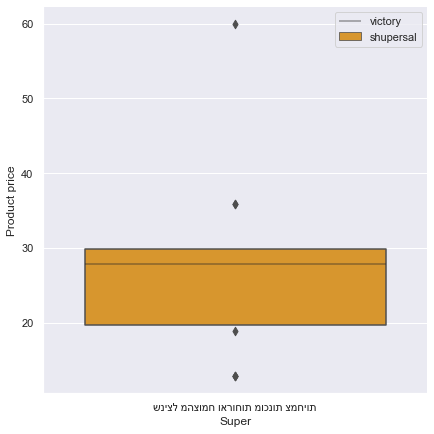

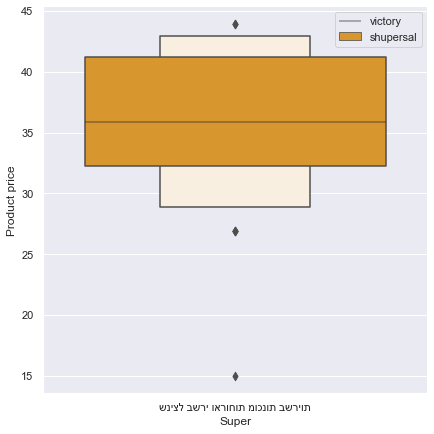

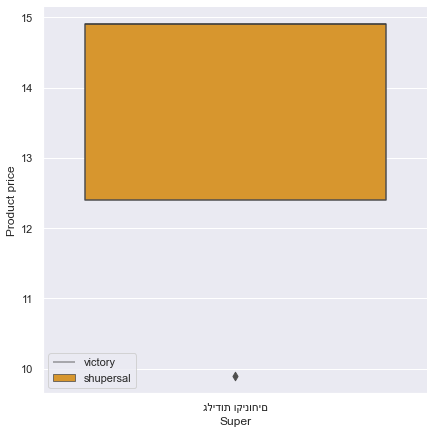

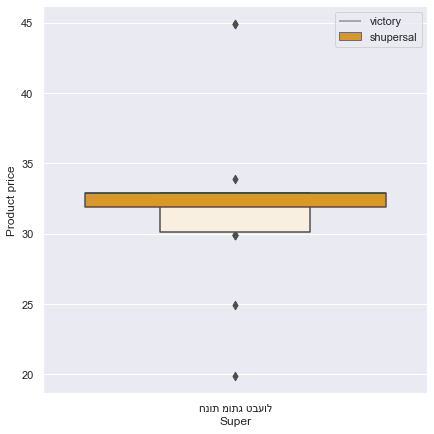

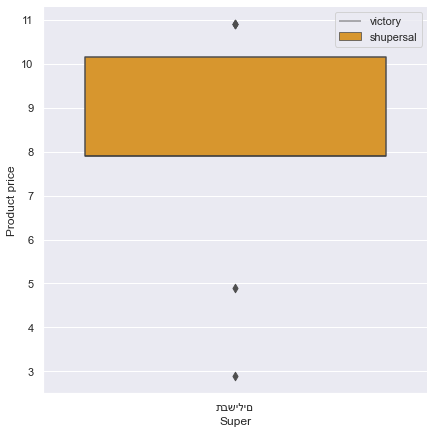

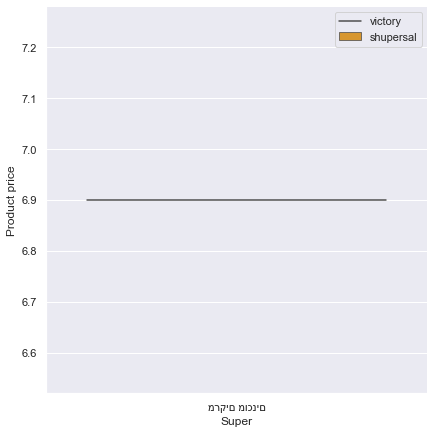

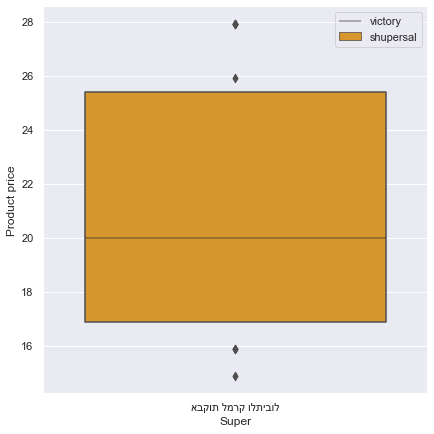

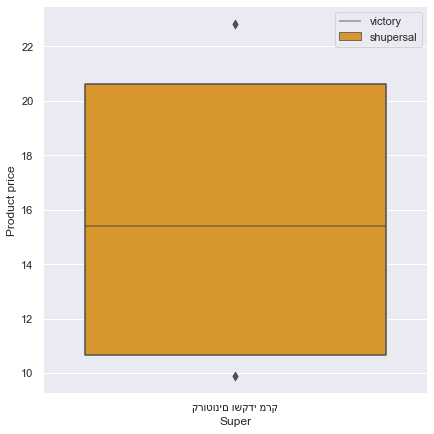

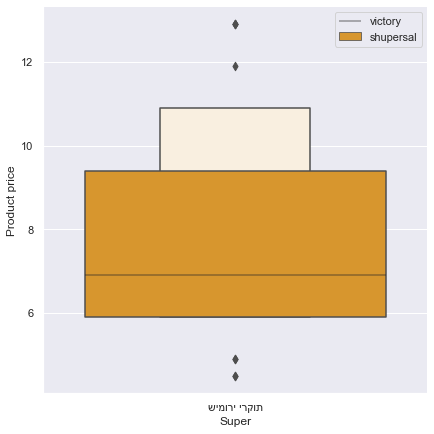

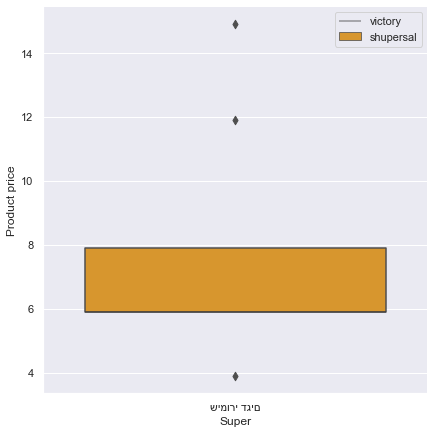

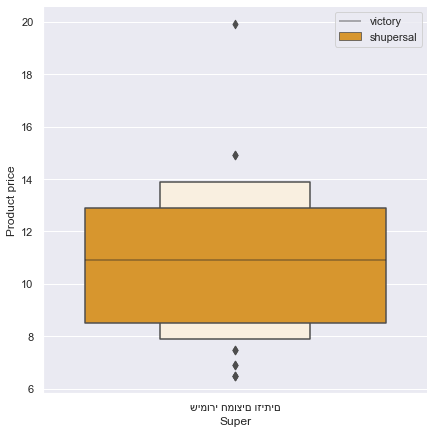

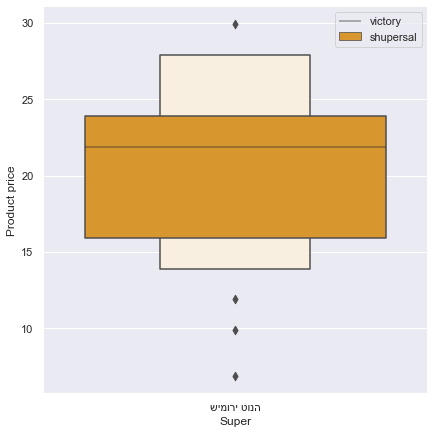

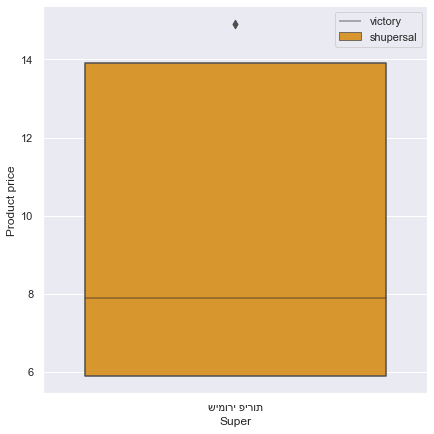

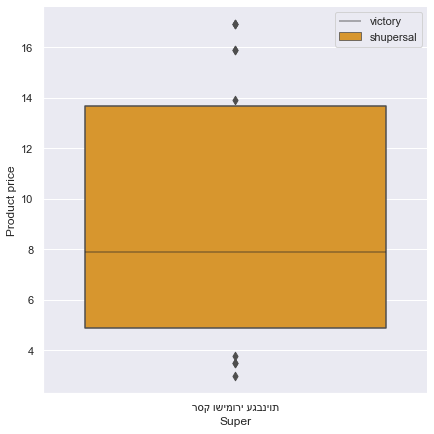

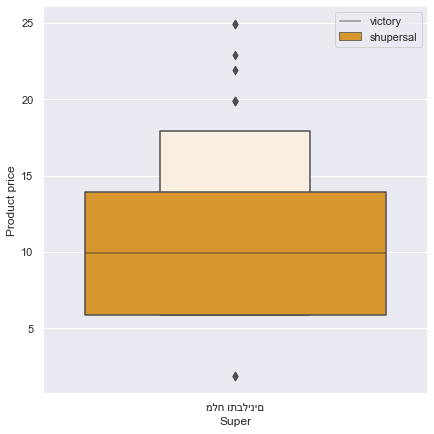

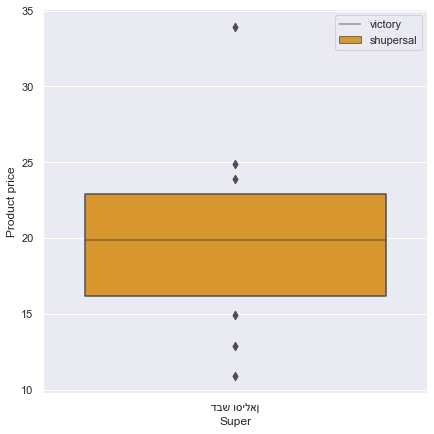

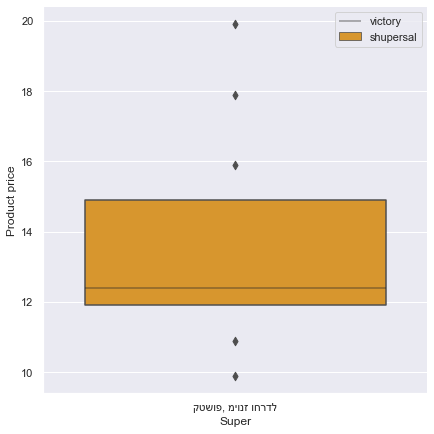

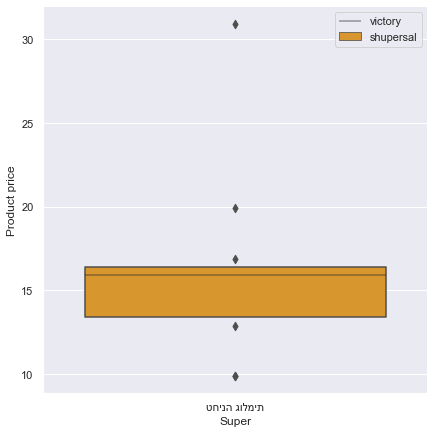

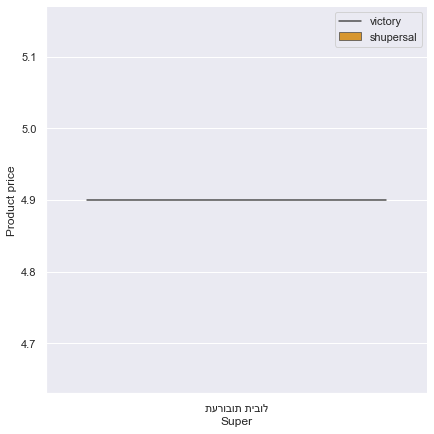

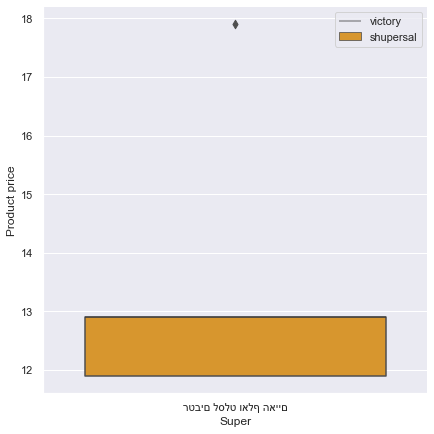

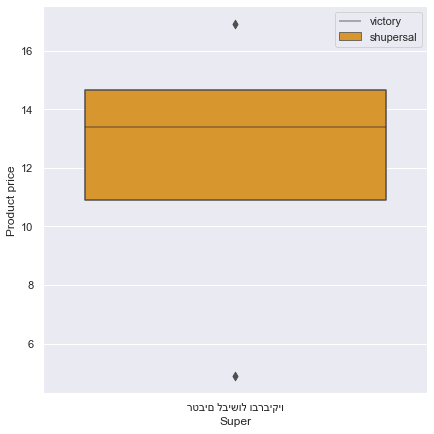

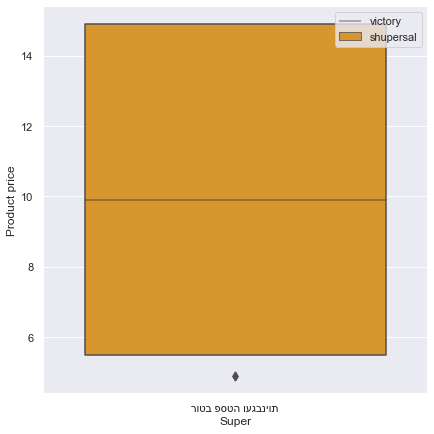

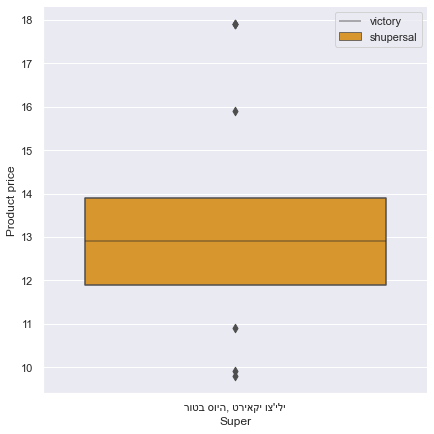

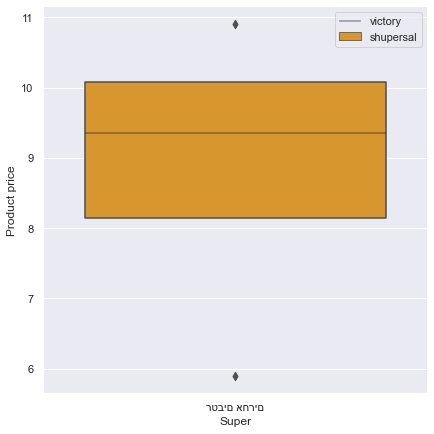

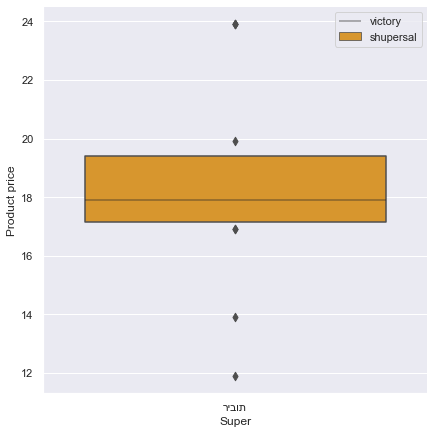

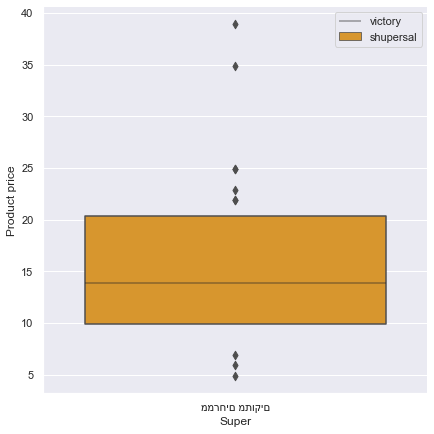

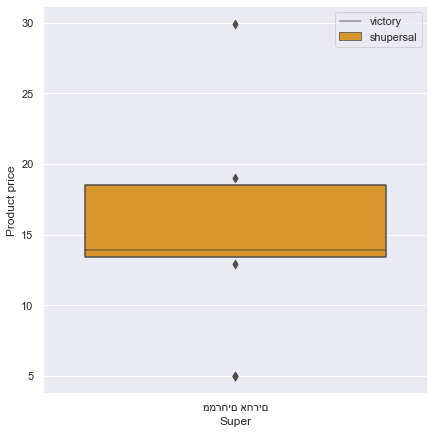

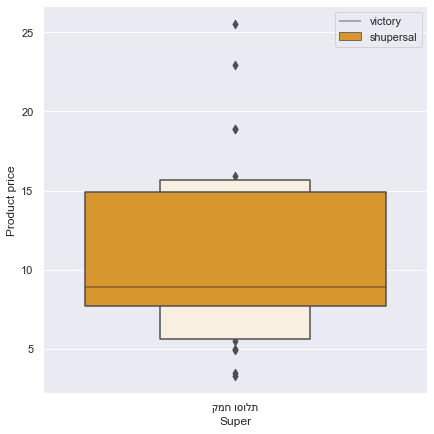

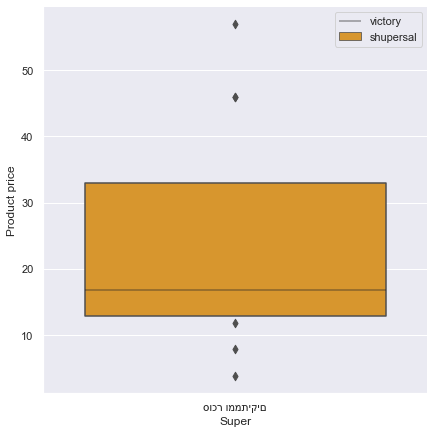

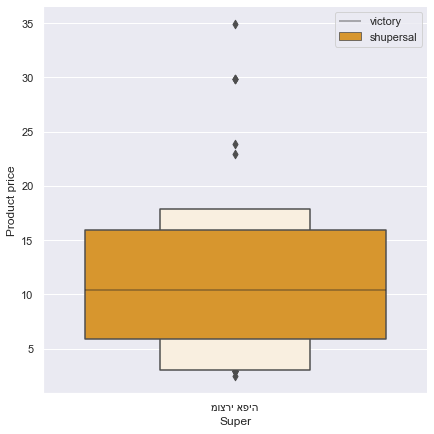

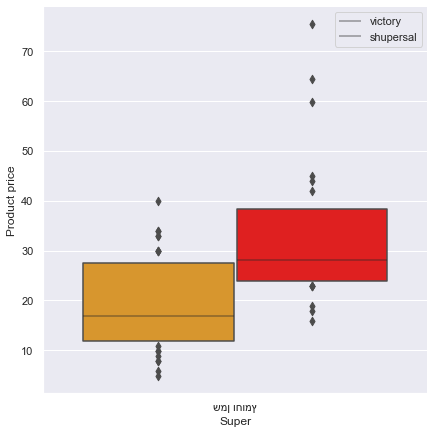

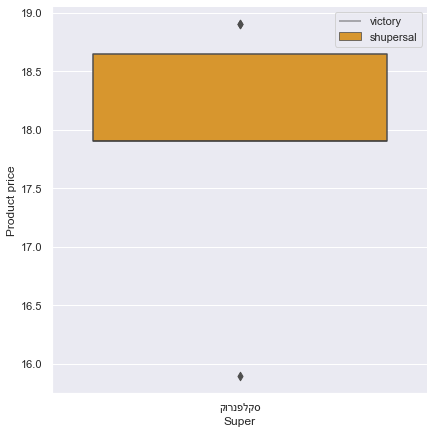

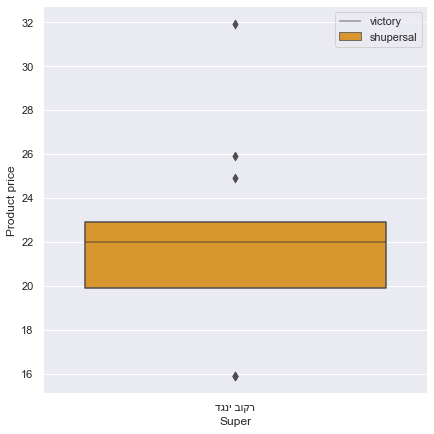

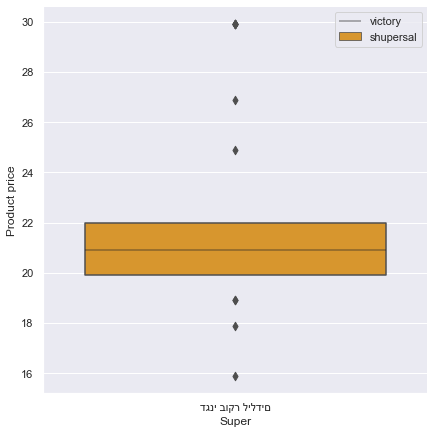

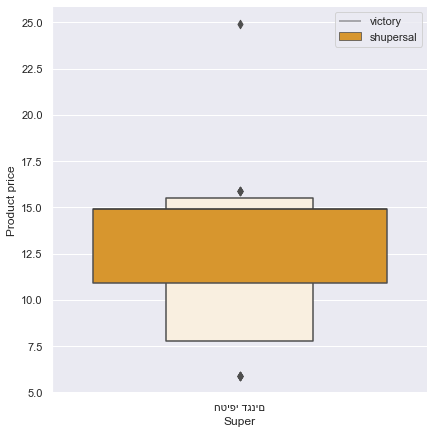

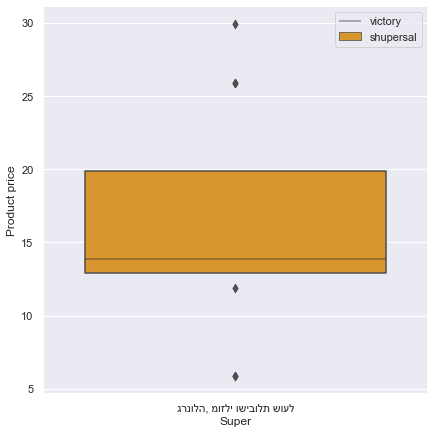

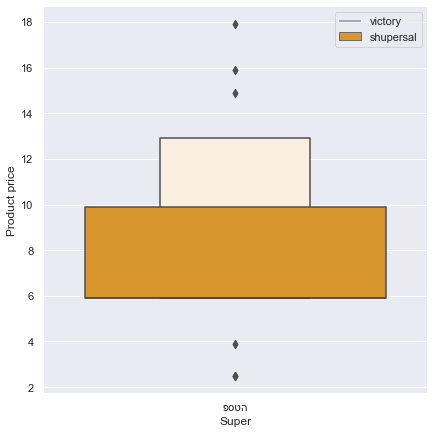

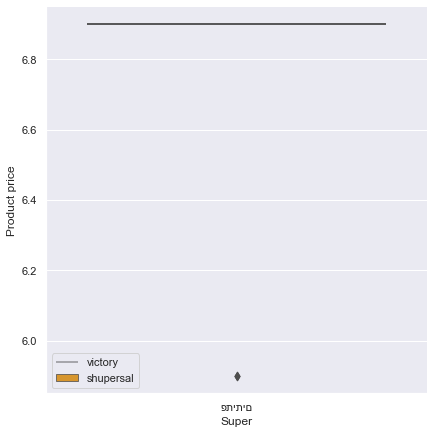

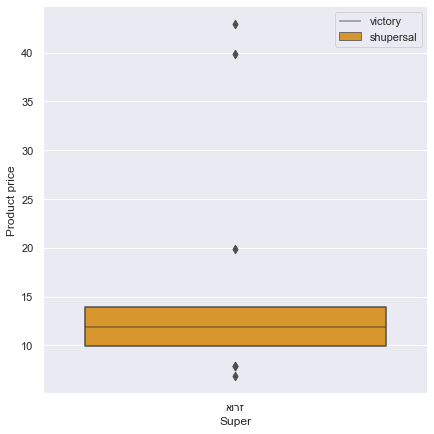

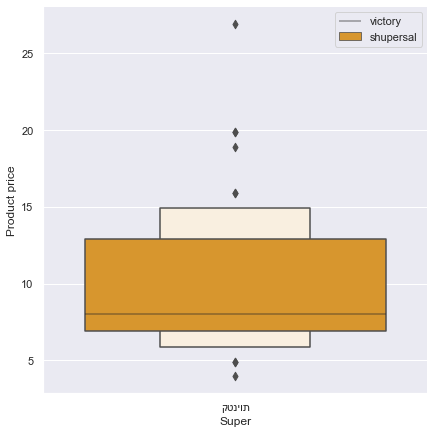

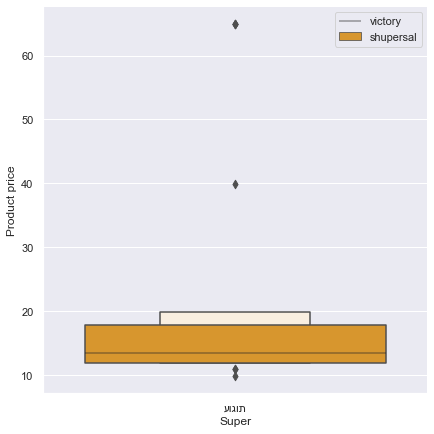

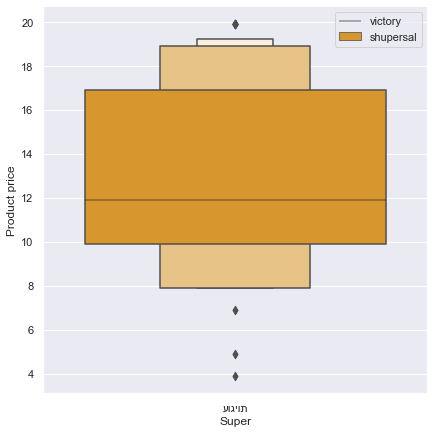

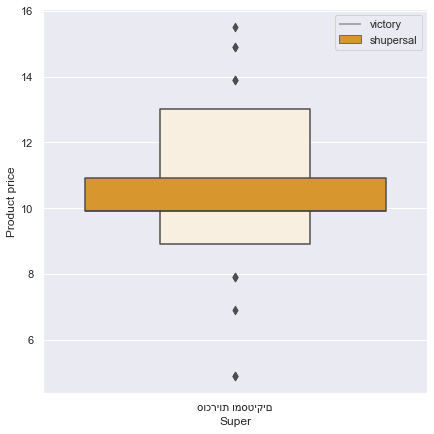

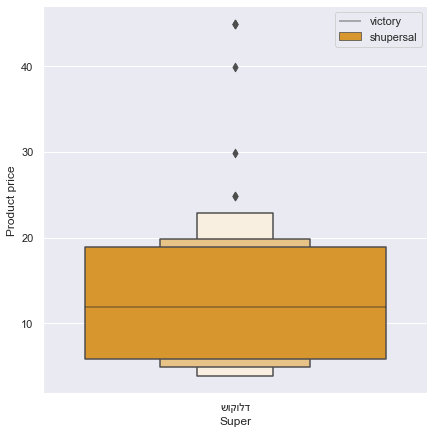

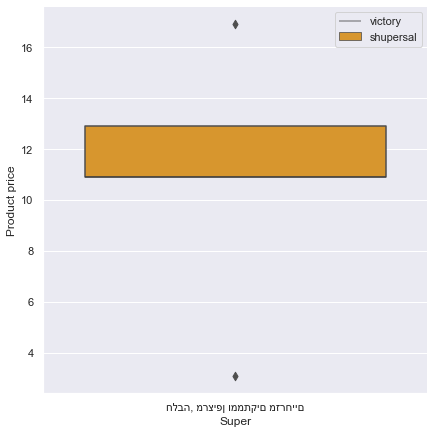

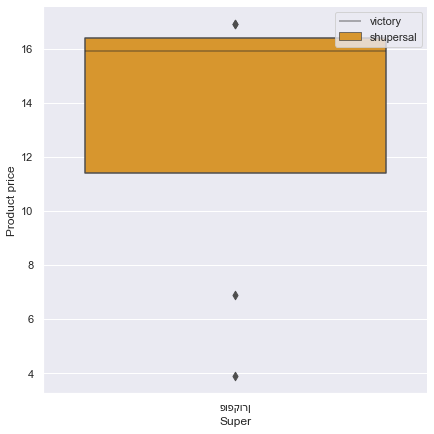

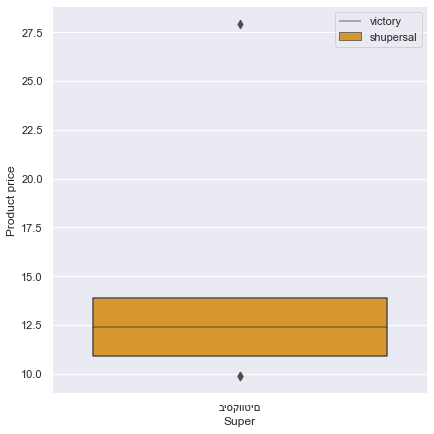

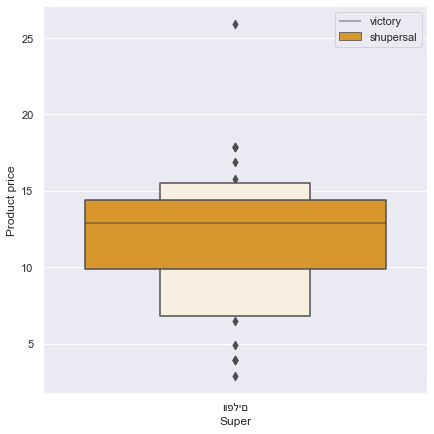

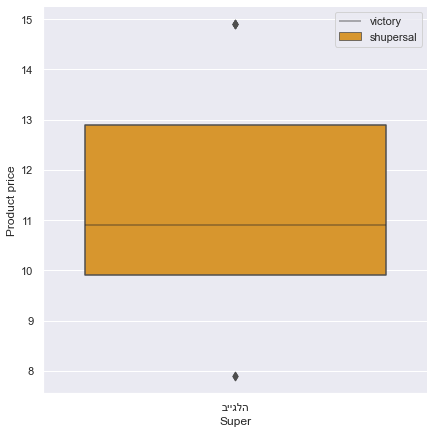

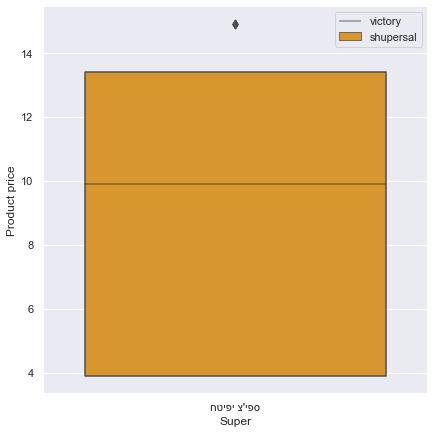

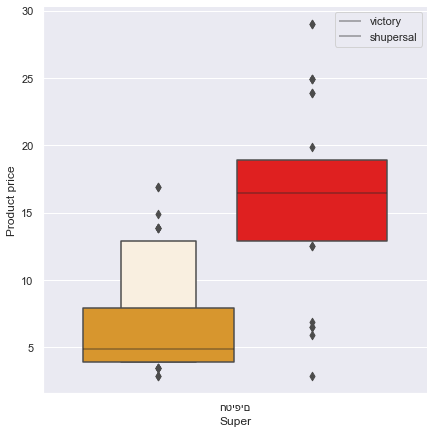

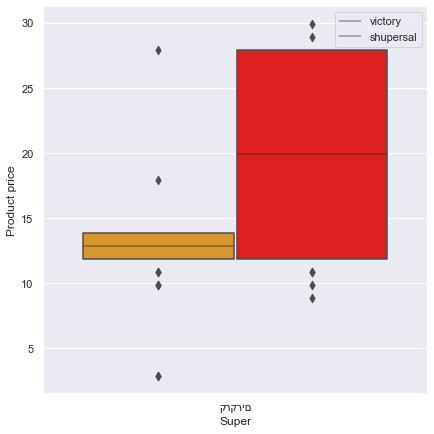

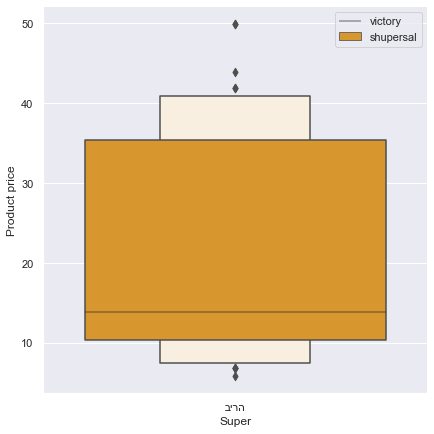

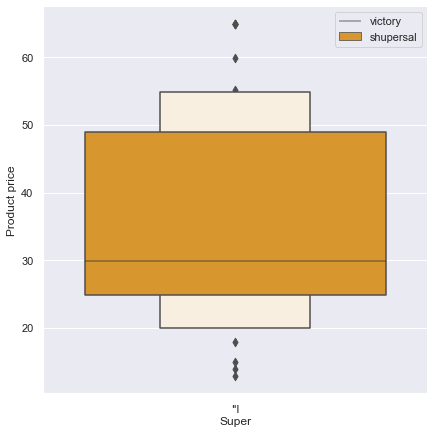

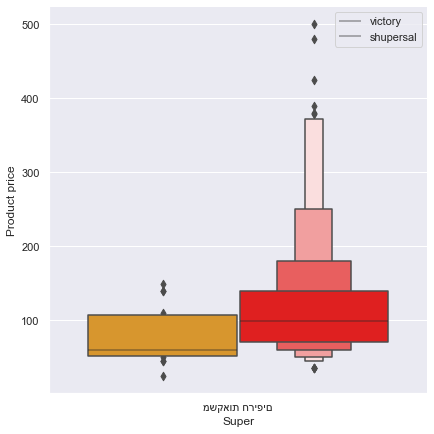

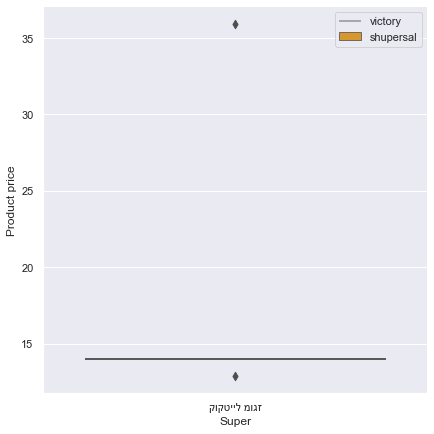

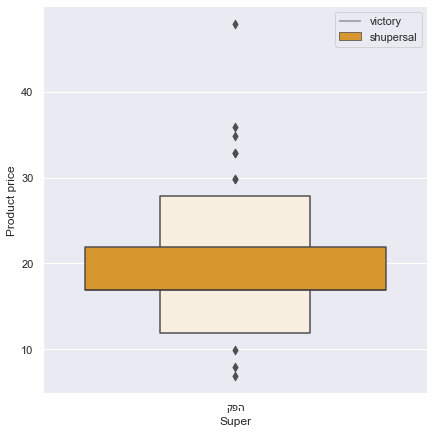

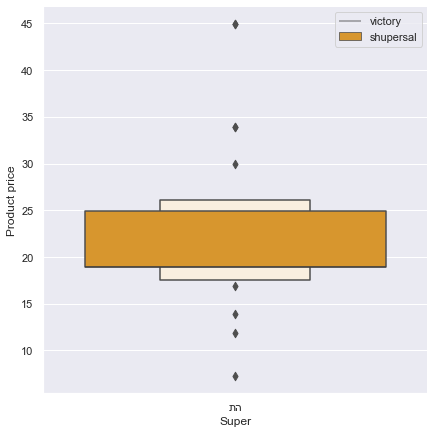

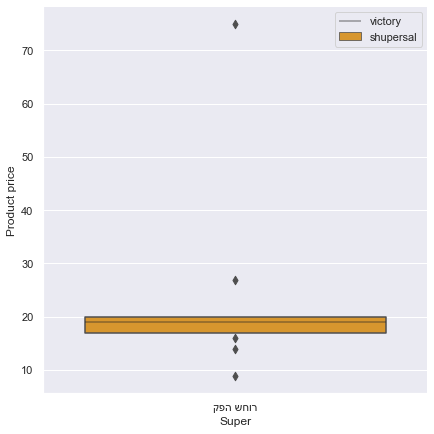

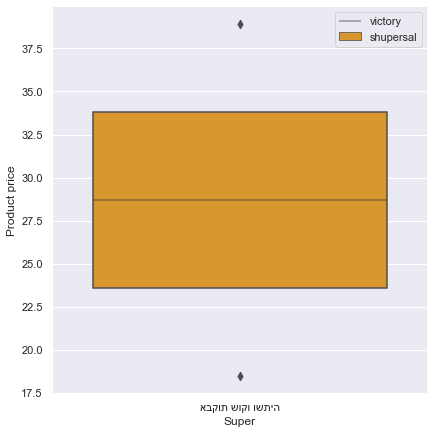

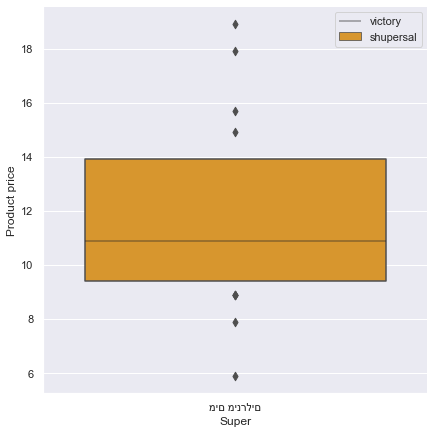

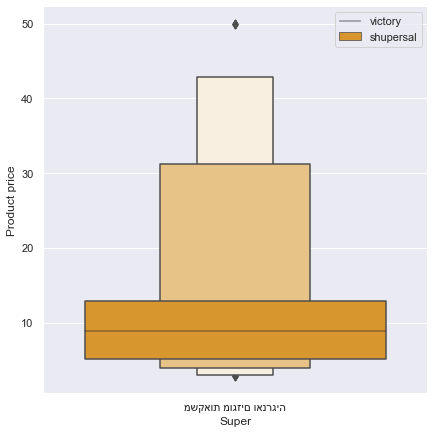

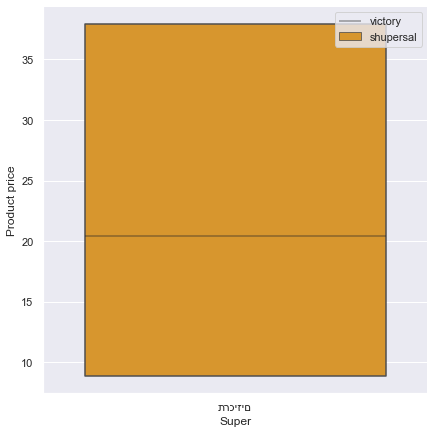

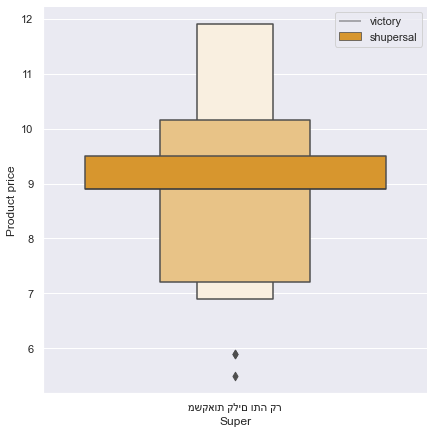

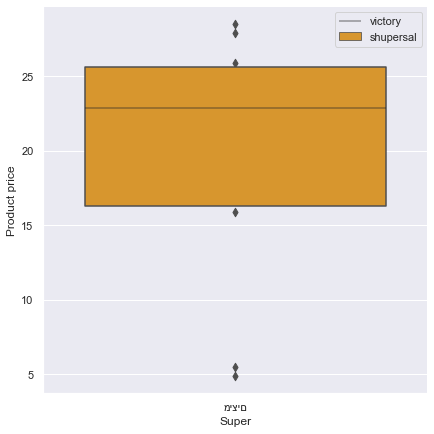

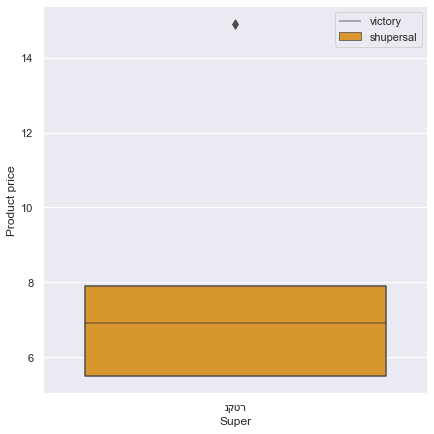

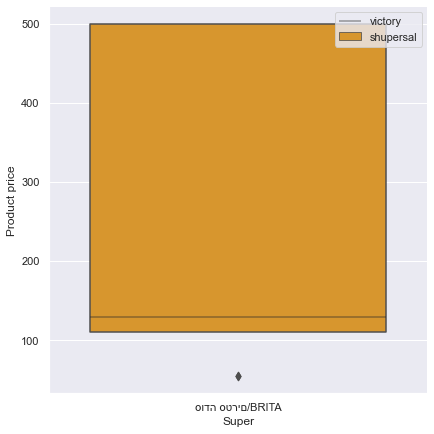

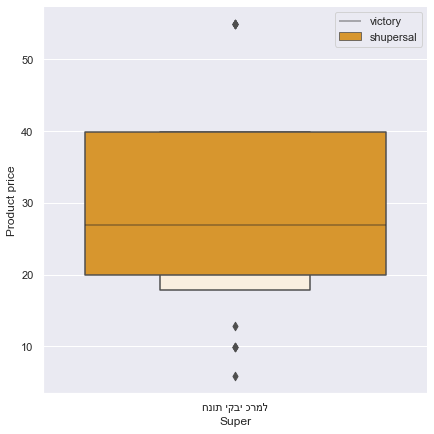

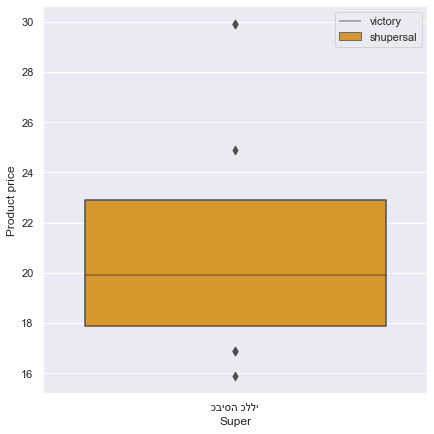

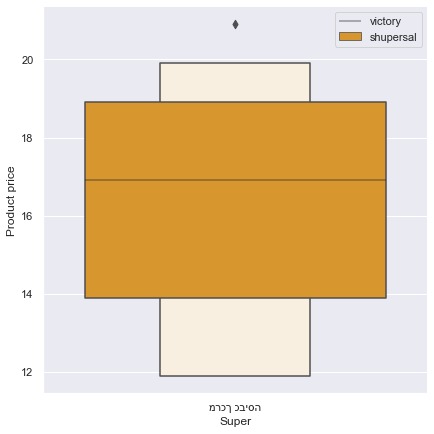

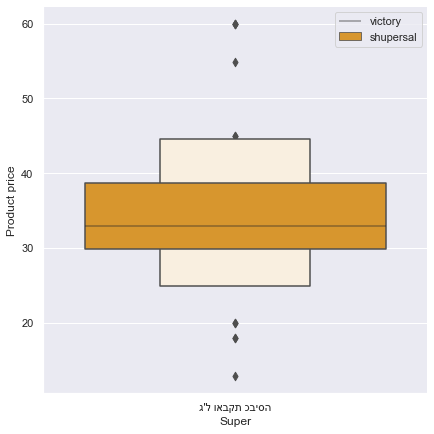

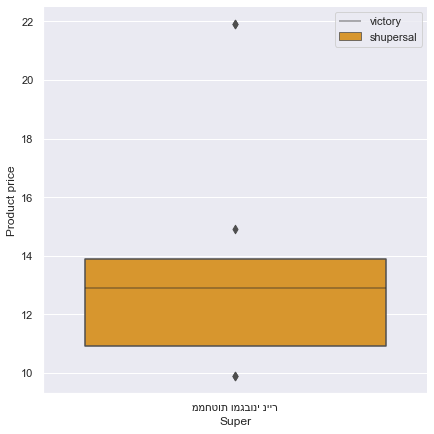

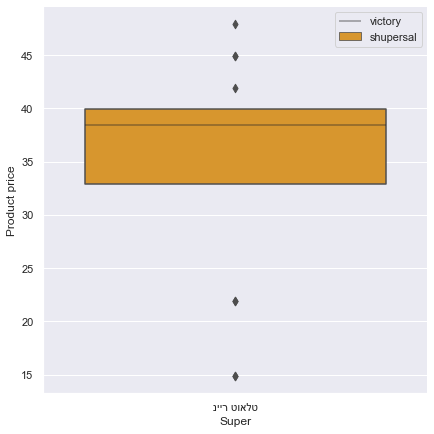

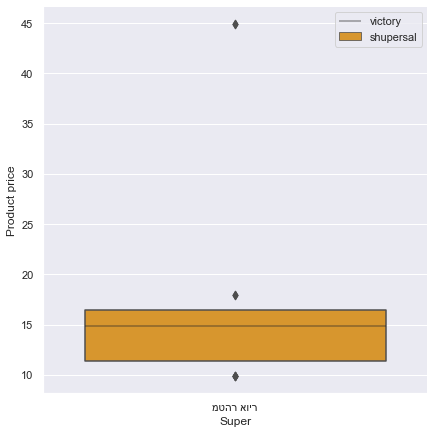

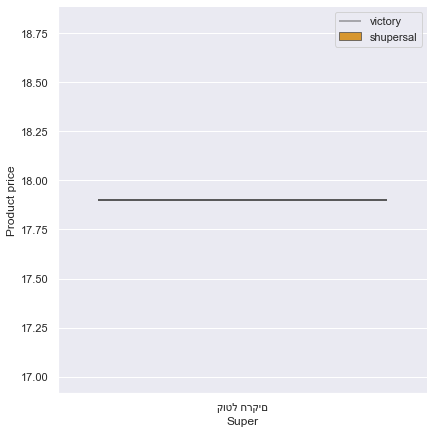

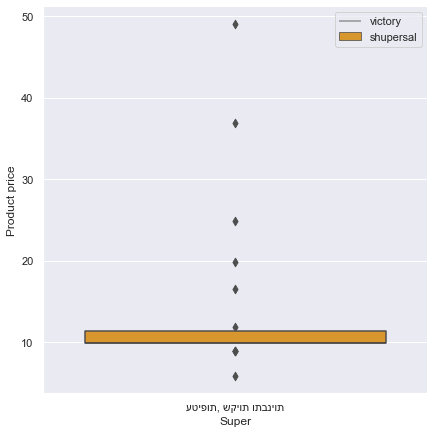

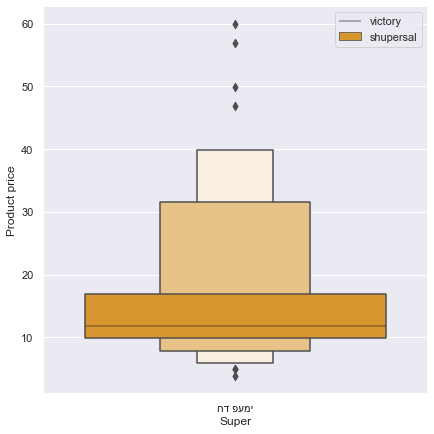

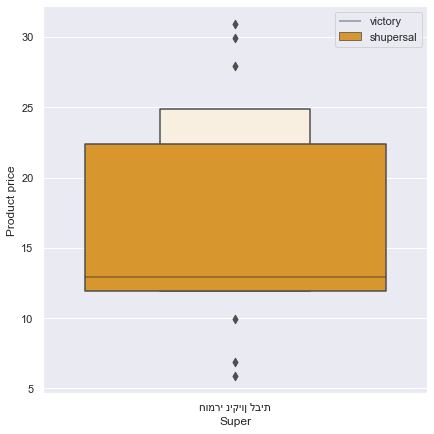

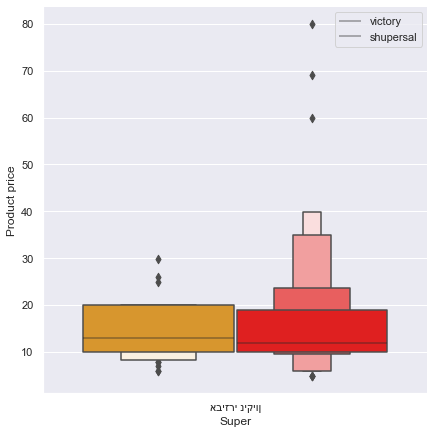

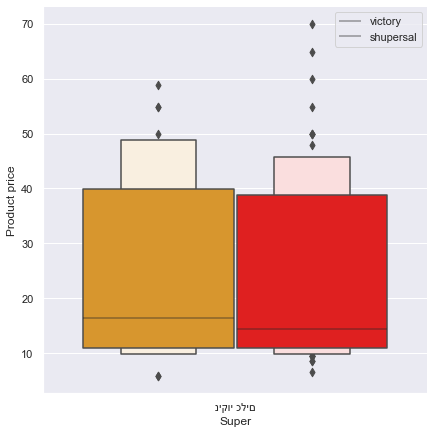

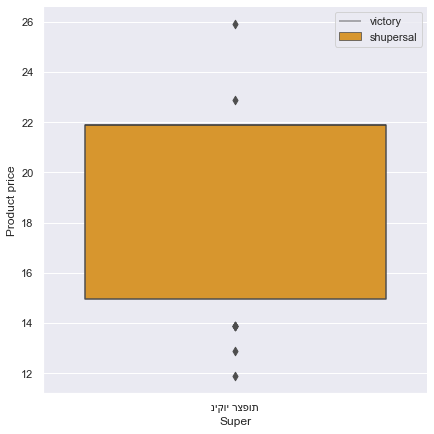

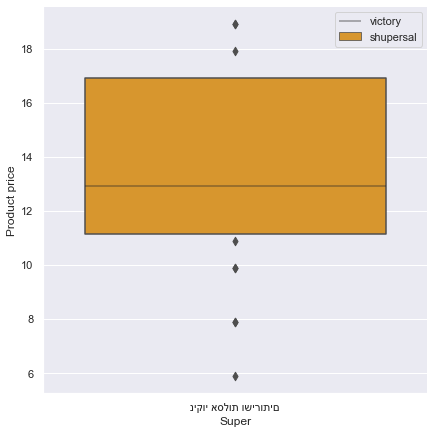

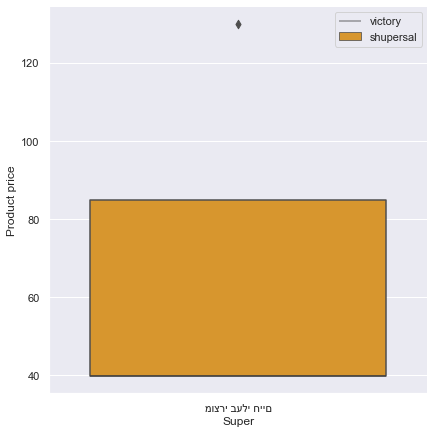

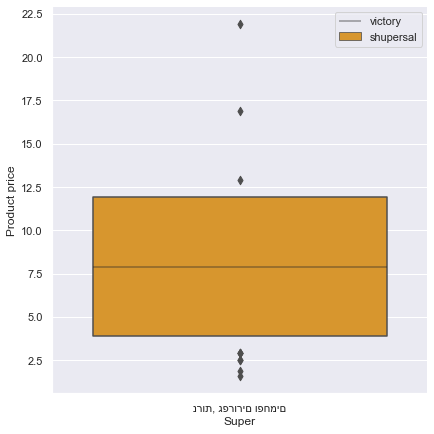

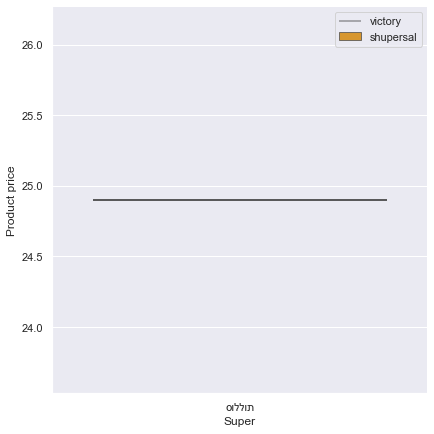

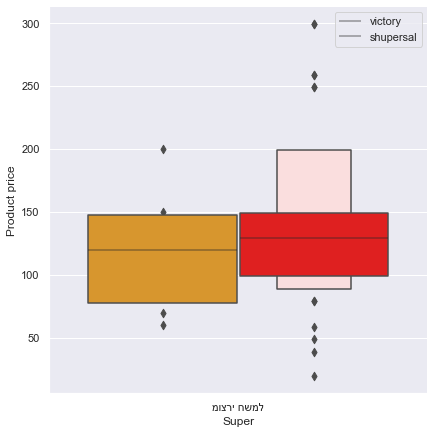

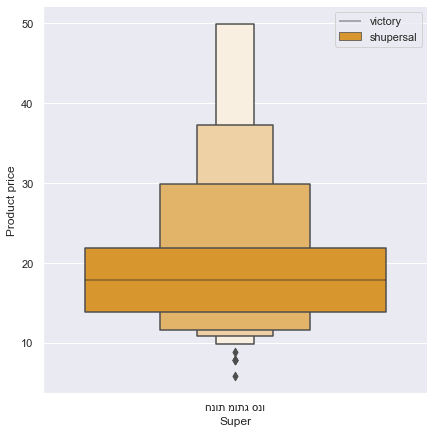

In [23]:
sns.set_theme()
for x in df2.catgory.unique():
    g = sns.catplot(
        x='catgory', 
        y='price',
        data=df2[df2.catgory==x],
        kind='boxen', 
        hue='super',
        palette=["#F39C12", "red"], 
        height=6, 
        aspect=1,
        legend=False,
        ).set_axis_labels('Super', 'Product price')
    g.ax.legend(labels=['victory','shupersal'])

# טיפול בחריגים (outliers)

ניתן לראות בבירור שמחיר רוב המוצרים הינו נמוך מ-1000 שח

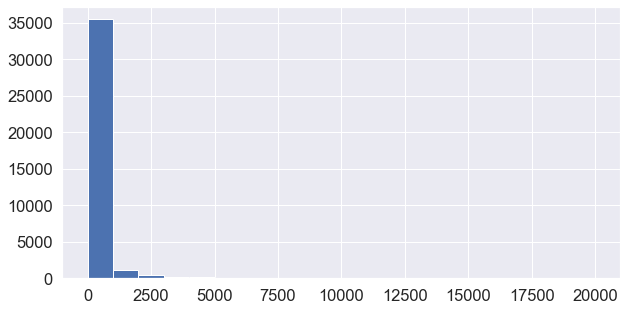

In [24]:
sns.set(font_scale = 1.5)
fig = plt.figure(figsize=(10,5))
plt.hist(df2.price, bins=20)
plt.xlabel=("price")
plt.ylabel=("Frequency")

לכן אשמור עותק הכולל גם את המוצרים היקרים ואעבוד עם עותק של מוצרים שמחירם קטן מ-3500

In [25]:
df_full=df2.copy() 

In [26]:
df2=df_full.copy()#נק' שמירה 

In [27]:
df2.price[df2.price>3000]=np.nan
df2.dropna(inplace=True)
df2.reset_index(inplace=True)
df2.drop(['index'],axis=1,inplace=True)
df2

,super,catgory,mean_price_for_catgory,product,suplier,sizes,units,Vol_Wei,UOM,price
0,וויקטורי,לחם,12.000000,לחם אחיד פרוס אנג'ל,אנג'ל,750 גרם,1,0.750,"ק""ג",6.6
1,וויקטורי,לחם,12.000000,לחם חיטה מלאה אנג'ל,אנג'ל,750 גרם,1,0.750,"ק""ג",14.9
2,וויקטורי,לחם,12.000000,לחם מחמצת בסגנון איטלקי אנג'ל,אנג'ל,500 גרם,1,0.500,"ק""ג",15.9
3,וויקטורי,לחם,12.000000,לחם עינן קל פרוס אנג'ל,אנג'ל,500 גרם,1,0.500,"ק""ג",14.8
4,וויקטורי,לחם,12.000000,לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל,אנג'ל,750 גרם,1,0.750,"ק""ג",12.9
...,...,...,...,...,...,...,...,...,...,...
36962,שופרסל,תוספי מזון,88.955143,אוטריבייבי תרסיס לאף,אוטרימר,"15 מ""ל",1,0.015,ליטר,24.9
36963,שופרסל,תוספי מזון,88.955143,אוטרימר תרסיס לאף,אוטרימר,"100 מ""ל",1,0.100,ליטר,69.0
36964,שופרסל,לספורטאים,64.808929,קולגן בוסט קלאסי,אלטמן,30 אריזות אישיות,30,0.000,יחידה,109.0
36965,שופרסל,לספורטאים,64.808929,היילופרו,נייצ'רס פרו,30 מוסות,30,0.000,יחידה,109.0


איחוד עמודת הגודל 

In [28]:
for x in range(df2['sizes'].count()):
    df2['sizes'][x]= df2['Vol_Wei'][x]*df2['units'][x]

In [29]:
df2

,super,catgory,mean_price_for_catgory,product,suplier,sizes,units,Vol_Wei,UOM,price
0,וויקטורי,לחם,12.000000,לחם אחיד פרוס אנג'ל,אנג'ל,0.75,1,0.750,"ק""ג",6.6
1,וויקטורי,לחם,12.000000,לחם חיטה מלאה אנג'ל,אנג'ל,0.75,1,0.750,"ק""ג",14.9
2,וויקטורי,לחם,12.000000,לחם מחמצת בסגנון איטלקי אנג'ל,אנג'ל,0.5,1,0.500,"ק""ג",15.9
3,וויקטורי,לחם,12.000000,לחם עינן קל פרוס אנג'ל,אנג'ל,0.5,1,0.500,"ק""ג",14.8
4,וויקטורי,לחם,12.000000,לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל,אנג'ל,0.75,1,0.750,"ק""ג",12.9
...,...,...,...,...,...,...,...,...,...,...
36962,שופרסל,תוספי מזון,88.955143,אוטריבייבי תרסיס לאף,אוטרימר,0.015,1,0.015,ליטר,24.9
36963,שופרסל,תוספי מזון,88.955143,אוטרימר תרסיס לאף,אוטרימר,0.1,1,0.100,ליטר,69.0
36964,שופרסל,לספורטאים,64.808929,קולגן בוסט קלאסי,אלטמן,0.0,30,0.000,יחידה,109.0
36965,שופרסל,לספורטאים,64.808929,היילופרו,נייצ'רס פרו,0.0,30,0.000,יחידה,109.0


# למידת מכונה 

In [30]:
df2.sample(5)

,super,catgory,mean_price_for_catgory,product,suplier,sizes,units,Vol_Wei,UOM,price
21881,שופרסל,"שולחנות, שידות וכסאות",856.433180,ספריית מדפים מעוצבת דגם פרלה -,גבע דיזיין,0.0,1,0.00,יחידה,349.0
2947,וויקטורי,קרקרים,15.000000,פיתה צ'יפס בטעם מלפפון חמוץ Breadz,Breadz,0.17,1,0.17,"ק""ג",13.9
3718,וויקטורי,חד פעמי,16.000000,טאצ' מפיות נייר שניב,שניב,0.0,150,0.00,יחידה,7.9
9061,שופרסל,חומוס וסלטים,13.167760,חומוס 9% שומן,אחלה,0.4,1,0.40,"ק""ג",8.8
10412,שופרסל,שימורים,11.449219,קינואה עם טונה בשמן זית,עץ הזית,0.16,1,0.16,"ק""ג",13.9


In [31]:
df2.describe()

,mean_price_for_catgory,units,Vol_Wei,price
count,36967.000000,36967.000000,36967.000000,36967.000000
mean,199.334671,8.612168,0.445598,165.558643
std,404.010694,45.439716,9.993035,389.632551
min,2.000000,0.000000,0.000000,1.000000
25%,16.776128,1.000000,0.000000,13.900000
50%,40.529841,1.000000,0.030000,29.900000
75%,151.515217,1.000000,0.300000,110.260000
max,2880.989740,1000.000000,1250.000000,2999.140000


In [32]:
df=df2.copy() ## נק'שמירה 


In [33]:
df.sample(10)

,super,catgory,mean_price_for_catgory,product,suplier,sizes,units,Vol_Wei,UOM,price
16754,שופרסל,מוצרים לחתול,35.589600,רויאל קנין חתול בייבי קט,רויאל קנין,0.0,4,0.000,יחידה,149.00
18251,שופרסל,מוצרי טיפוח אישי,589.758036,אמבט עיסוי ספא מפנק לרגליים לטיפול בכפות הרגלי...,MEDICS CARE,0.0,1,0.000,יחידה,199.00
12457,שופרסל,חטיפים מלוחים,10.515169,צ'יפס טרה בטטה עם מלח,טרה צ'יפס,0.03,1,0.030,"ק""ג",5.90
6273,שופרסל,מוצרי עוף והודו,36.987719,כרעיים פרימיום שופרסל,שופרסל,0.0,1,0.000,יחידה,34.90
28048,שופרסל,איפור עיניים,66.023268,EVERLAST דיפ ליינר שחור,CARELINE,0.0,1,0.000,יחידה,41.18
29916,שופרסל,טיפוח גוף,30.197204,ויט רצועות שעווה צמחית,ויט,0.0,12,0.000,יחידה,24.90
562,וויקטורי,גבינות רכות,16.000000,גבינת עין גדי / קממבר תנובה קולקשן,תנובה,0.125,1,0.125,"ק""ג",17.80
2781,וויקטורי,ביסקווטים,13.000000,עד חצות ביסקויט פריך בשוקולד מריר עלית,עלית,0.2,1,0.200,"ק""ג",13.90
30356,שופרסל,טיפוח טבעי,73.032211,שמפו קיק שיבולת שועל,קוסמטיקהOS+,0.45,1,0.450,ליטר,34.90
36873,שופרסל,מתוקים,17.824113,"מיני כיף כף שקית ללת""ס",עלית,0.2,1,0.200,"ק""ג",19.90


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
df.columns

Index(['super', 'catgory', 'mean_price_for_catgory', 'product', 'suplier',
       'sizes', 'units', 'Vol_Wei', 'UOM', 'price'],
      dtype='object')

אהפוך את הדאטה למספרי על מנת שאוכל לעבד אותו 

In [36]:
df['super']=LabelEncoder().fit_transform(df['super'])
df['catgory']=LabelEncoder().fit_transform(df['catgory'])
df['product']=LabelEncoder().fit_transform(df['product'])
df['suplier']=LabelEncoder().fit_transform(df['suplier'])
df['UOM']=LabelEncoder().fit_transform(df['UOM'])


In [37]:
df.describe()

,super,catgory,mean_price_for_catgory,product,suplier,units,Vol_Wei,UOM,price
count,36967.000000,36967.000000,36967.000000,36967.000000,36967.000000,36967.000000,36967.000000,36967.000000,36967.000000
mean,0.875511,159.590797,199.334671,18435.969973,1276.299592,8.612168,0.445598,0.841697,165.558643
std,0.330144,95.545308,404.010694,10642.948862,805.624419,45.439716,9.993035,0.869254,389.632551
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,85.000000,16.776128,9222.500000,637.000000,1.000000,0.000000,0.000000,13.900000
50%,1.000000,148.000000,40.529841,18434.000000,1298.000000,1.000000,0.030000,1.000000,29.900000
75%,1.000000,237.000000,151.515217,27650.500000,2010.000000,1.000000,0.300000,2.000000,110.260000
max,1.000000,337.000000,2880.989740,36872.000000,2557.000000,1000.000000,1250.000000,2.000000,2999.140000


In [38]:
df.dropna(inplace=True)

In [39]:
df

,super,catgory,mean_price_for_catgory,product,suplier,sizes,units,Vol_Wei,UOM,price
0,0,137,12.000000,13327,834,0.75,1,0.750,2,6.6
1,0,137,12.000000,13363,834,0.75,1,0.750,2,14.9
2,0,137,12.000000,13391,834,0.5,1,0.500,2,15.9
3,0,137,12.000000,13409,834,0.5,1,0.500,2,14.8
4,0,137,12.000000,13419,834,0.75,1,0.750,2,12.9
...,...,...,...,...,...,...,...,...,...,...
36962,1,330,88.955143,2461,739,0.015,1,0.015,1,24.9
36963,1,330,88.955143,2465,739,0.1,1,0.100,1,69.0
36964,1,146,64.808929,29311,814,0.0,30,0.000,0,109.0
36965,1,146,64.808929,8091,1872,0.0,30,0.000,0,109.0


In [40]:
X=df.drop(['price'],axis=1).copy()
y=df['price']

In [41]:
X

,super,catgory,mean_price_for_catgory,product,suplier,sizes,units,Vol_Wei,UOM
0,0,137,12.000000,13327,834,0.75,1,0.750,2
1,0,137,12.000000,13363,834,0.75,1,0.750,2
2,0,137,12.000000,13391,834,0.5,1,0.500,2
3,0,137,12.000000,13409,834,0.5,1,0.500,2
4,0,137,12.000000,13419,834,0.75,1,0.750,2
...,...,...,...,...,...,...,...,...,...
36962,1,330,88.955143,2461,739,0.015,1,0.015,1
36963,1,330,88.955143,2465,739,0.1,1,0.100,1
36964,1,146,64.808929,29311,814,0.0,30,0.000,0
36965,1,146,64.808929,8091,1872,0.0,30,0.000,0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [43]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14787 entries, 3234 to 19666
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   super                   14787 non-null  int32  
 1   catgory                 14787 non-null  int32  
 2   mean_price_for_catgory  14787 non-null  float64
 3   product                 14787 non-null  int32  
 4   suplier                 14787 non-null  int32  
 5   sizes                   14787 non-null  object 
 6   units                   14787 non-null  int64  
 7   Vol_Wei                 14787 non-null  float64
 8   UOM                     14787 non-null  int32  
dtypes: float64(2), int32(5), int64(1), object(1)
memory usage: 866.4+ KB


In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22180 entries, 22084 to 2732
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   super                   22180 non-null  int32  
 1   catgory                 22180 non-null  int32  
 2   mean_price_for_catgory  22180 non-null  float64
 3   product                 22180 non-null  int32  
 4   suplier                 22180 non-null  int32  
 5   sizes                   22180 non-null  object 
 6   units                   22180 non-null  int64  
 7   Vol_Wei                 22180 non-null  float64
 8   UOM                     22180 non-null  int32  
dtypes: float64(2), int32(5), int64(1), object(1)
memory usage: 1.3+ MB


In [45]:
reg=LinearRegression(fit_intercept=False)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

In [46]:
y_pred

array([6.31468104e-01, 6.79893787e+02, 3.24572748e+01, ...,
       7.35916492e+01, 2.98588413e+02, 2.08822457e+01])

In [47]:

df_chek=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

In [48]:
df_chek

,y_test,y_pred
3234,19.9,0.631468
17847,1375.0,679.893787
13279,9.5,32.457275
35948,19.5,32.882968
5543,7.9,25.828333
...,...,...
17292,99.0,581.748797
34875,10.9,41.864280
30388,39.9,73.591649
26254,339.0,298.588413


In [49]:
def sse(Y, Y_HAT):  
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    return sse

SSE = sse(y_test,y_pred).flatten()

print(SSE)

[9.94605077e+08]


In [50]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred).flatten()

array([0.57148239])

In [51]:
print (f"r^2 score: {metrics.r2_score(y_test,y_pred)}")

r^2 score: 0.5714823920453767


In [52]:
for k,v in sorted(dict(zip(X.columns,abs(reg.coef_))).items(),key=lambda x:x[1], reverse=True):
    print(k,v)

super 30.497712823994913
UOM 19.28118251882313
mean_price_for_catgory 0.6870224499320515
Vol_Wei 0.21534959798517395
catgory 0.13752951855302029
units 0.046194342201385276
suplier 0.010089721554272735
sizes 0.006588153391076587
product 0.0003680874076890529
